# 0.Libraray Import & Data Load
- 유동인구 데이터 (SKT)
- 카드데이터 (신한카드)
- 유통데이터 (편의점, GS)
- SNS 데이터 (와이즈넛 Wisenut)

- 외부데이터
  - 코로나데이터 (코로나 확진자 수 데이터)
  - 날씨데이터 (서울 대구, 평균기온, 일강수량, 평균상대습도)
  - 행정동별 거주인구 데이터 (2019)
  - 휴일 여부 데이터 (2020, 2019)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 분석 library
import pandas as pd
import numpy as np

# 통계용 library
import scipy
from scipy.stats.stats import pearsonr # 상관계수
import statsmodels.formula.api as smf # 회귀모델용

!pip install pingouin
import pingouin as pg # 편상관분석용

# 기타
from functools import reduce
import datetime
from datetime import datetime, timedelta
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 225kB 8.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=bceb86950fa5df12086011a58969759b978696244d8bd08a4a61b76882c93434
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=b3be61e1d0da351262e6554b828b75293a985d69c3c954c020415ea00b776a7e
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=5574d1ef3b05bdde0d5a6a287e1ab3042fa9e0587923e7365a1ba466b1ea79e8
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


## 유동인구 데이터 (2020, 2019)
- SKT 유동인구 데이터 2020, 2019 사용

In [3]:
# 2020년 데이터
skt_age_202002 = pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_202002.CSV", sep="|")
skt_age_202003 = pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_202003.CSV", sep="|")
skt_age_202004 = pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_202004.CSV", sep="|")
skt_age_202005 = pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_202005.CSV", sep="|")

# 2019 유동인구 데이터 age
skt_age_201902=pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_201902.CSV", sep="|")
skt_age_201903=pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_201903.CSV", sep="|")
skt_age_201904=pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_201904.CSV", sep="|")
skt_age_201905=pd.read_csv("/content/drive/My Drive/big_contest/skt/4개지역_FLOW_AGE_201905.CSV", sep="|")

# skt 데이터 합침 (2020, 2019)
skt_2020 = pd.concat([skt_age_202002,skt_age_202003,skt_age_202004,skt_age_202005]) # 2020년 데이터
skt_2019 = pd.concat([skt_age_201902, skt_age_201903, skt_age_201904, skt_age_201905]) # 2019년 데이터

print(skt_2020.shape, skt_2019.shape)
skt_2020

(8349, 34) (8280, 34)


,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,202002,20200201,1114052000,소공동,0.0,88.95,376.68,1077.03,3602.41,6660.39,6519.52,5675.54,5063.35,5992.92,6207.66,5997.45,6356.51,4740.35,5766.20,0.0,73.78,433.73,1408.06,4999.85,6961.02,5115.24,4164.47,3927.93,4058.47,3932.39,3650.70,3361.05,2440.61,2665.43
1,202002,20200202,1114052000,소공동,0.0,51.03,271.96,871.27,2824.97,5031.63,4626.14,3975.63,3455.81,4218.84,4473.19,4183.04,4278.93,3182.24,3567.28,0.0,55.15,327.72,1231.75,3807.14,4702.91,3698.04,2922.33,2781.63,2947.01,2632.34,2669.56,2399.90,1704.22,2026.77
2,202002,20200203,1114052000,소공동,0.0,32.47,136.94,826.26,3580.23,8823.11,11803.45,14934.31,14823.99,16430.05,14201.85,10908.99,9628.67,6658.04,7411.35,0.0,35.09,155.99,1166.65,6301.35,11109.59,10754.75,9655.01,9018.58,8786.59,7257.35,5710.55,4935.00,3070.67,3349.99
3,202002,20200204,1114052000,소공동,0.0,27.34,154.75,823.69,3510.75,9361.85,12127.55,15650.18,15484.99,16854.01,14653.71,11550.17,9567.69,6884.62,7319.09,0.0,40.41,193.20,1148.80,6345.14,11771.06,11467.86,9834.22,9323.74,8982.67,7448.09,5938.57,4948.10,3091.30,3494.91
4,202002,20200205,1114052000,소공동,0.0,26.30,177.28,809.21,3579.35,9631.85,12378.43,15876.88,15624.94,16730.33,14462.22,11456.97,9360.22,6709.08,6951.99,0.0,36.44,172.20,1285.73,6587.78,11876.40,11285.83,9972.17,9299.52,8976.55,7183.79,5719.89,4822.39,2960.73,3204.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,202005,20200527,2726069000,고산3동,0.0,70.07,519.05,956.45,1205.44,1507.57,1500.51,2014.87,2295.21,2947.78,3020.17,2653.97,2217.68,1561.13,1492.80,0.0,114.34,552.87,842.82,1264.78,1201.14,1106.57,1728.34,2209.31,2808.54,2721.54,2070.62,1613.50,1086.34,1143.37
2135,202005,20200528,2726069000,고산3동,0.0,99.04,749.36,1085.68,1639.82,1777.32,1776.02,2137.50,2582.56,3415.30,3458.23,3019.66,2550.45,1845.30,1780.62,0.0,146.62,733.55,1117.85,1597.98,1377.94,1258.02,1847.61,2677.19,3342.68,3036.71,2389.70,1848.92,1291.19,1515.36
2136,202005,20200529,2726069000,고산3동,0.0,155.70,781.70,1235.94,1706.97,1982.74,1924.60,2500.02,2810.11,3625.34,3718.35,3212.18,2852.53,1755.48,1811.35,0.0,111.30,801.94,1167.51,1709.27,1583.58,1487.06,2149.30,2916.87,3643.31,3395.24,2800.02,2043.25,1356.15,1455.89
2137,202005,20200530,2726069000,고산3동,0.0,119.89,903.85,1236.60,1722.01,2142.41,2106.49,2215.86,2649.30,3713.62,3854.18,3138.66,2506.90,1683.99,1666.55,0.0,152.58,727.46,1229.17,1627.58,1644.73,1420.31,1812.27,2640.71,3362.25,2909.34,2353.82,1812.56,1242.56,1372.38


In [4]:
# skt 유동인구 데이터

# 2020 유동인구 데이터 연령 총합 변수 만들기
skt_2020['sum_20'] = skt_2020.iloc[:,4:].sum(axis=1)
skt_2020 = skt_2020[['STD_YMD','HDONG_NM','sum_20']]
skt_2020.columns = ['STD_DD','HDONG_NM','sum_20']
skt_2020 = skt_2020.reset_index(drop=True)

# 2019 유동인구 데이터 연령 총합 변수 만들기
skt_2019["sum_19"] = skt_2019.iloc[:,4:].sum(axis=1)
skt_2019 = skt_2019[["STD_YMD","HDONG_NM","sum_19"]]
skt_2019.columns = ['STD_DD','HDONG_NM','sum_19']
skt_2019 = skt_2019.reset_index(drop=True)

print(skt_2020.shape, skt_2019.shape)
skt_2019

(8349, 3) (8280, 3)


,STD_DD,HDONG_NM,sum_19
0,20190201,소공동,242230.68
1,20190202,소공동,133411.99
2,20190203,소공동,90124.93
3,20190204,소공동,83378.55
4,20190205,소공동,111009.47
...,...,...,...
8275,20190527,고산3동,47011.48
8276,20190528,고산3동,49344.74
8277,20190529,고산3동,50345.41
8278,20190530,고산3동,50148.22


## 카드데이터 (2020, 2019)
- 신한카드 데이터 (외국인 + 내국인)
- 신한카드 행정동 데이터
- 카드 데이터 + 행정동 데이터 Merge
- 2020, 2019 데이터 분리
- 카드데이터 업종별 대분류 리스트 변수 생성

In [5]:
# 신한 카드 데이터 (내국인, 외국인)
card_re = pd.read_csv('/content/drive/My Drive/big_contest/shinhan/CARD_SPENDING_RESIDENT.txt', sep = "\t", engine='python', encoding = "cp949")
card_fo = pd.read_csv('/content/drive/My Drive/big_contest/shinhan/CARD_SPENDING_FOREIGNER.txt', sep = "\t", engine='python', encoding = "cp949")

# 신한 카드 행정동 데이터
dong = pd.read_excel('/content/drive/My Drive/big_contest/shinhan/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx', sheet_name='(참고) 행정동코드',index_col=0, header=None)

print(card_re.shape, card_fo.shape, dong.shape)

(2537753, 8) (238829, 7) (71, 4)


In [6]:
# 카드 행정동 데이터 전처리
dong.columns = ['GU_CD','DONG_CD','GU_NM','HDONG_NM']
dong.reset_index(inplace=True, drop=True)
dong = dong.loc[2:]
dong = dong.reset_index(drop=True)

# 컬럼 type int 형으로 변경
dong['GU_CD'] = dong['GU_CD'].astype(int)
dong['DONG_CD'] = dong['DONG_CD'].astype(int)

# 카드 데이터 (내국인 + 외국인) concat
card = pd.concat([card_fo,card_re])

# 행정동 이름과 카드 데이터 merge
card = pd.merge(card, dong, on=['GU_CD','DONG_CD'])

print(card.shape)
card

(2776582, 11)


,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT,SEX_CD,AGE_CD,GU_NM,HDONG_NM
0,20190204,260,510,81,대만,2,30.0,NaN,NaN,대구 수성구,범어1동
1,20190213,260,510,40,대만,2,32.0,NaN,NaN,대구 수성구,범어1동
2,20190416,260,510,40,대만,2,16.0,NaN,NaN,대구 수성구,범어1동
3,20190419,260,510,42,대만,3,610.0,NaN,NaN,대구 수성구,범어1동
4,20190308,260,510,10,대만,7,629.0,NaN,NaN,대구 수성구,범어1동
...,...,...,...,...,...,...,...,...,...,...,...
2776577,20200531,350,710,81,NaN,47,570.0,M,45.0,서울 노원구,상계9동
2776578,20200531,350,710,81,NaN,33,444.0,M,50.0,서울 노원구,상계9동
2776579,20200531,350,710,81,NaN,28,403.0,M,55.0,서울 노원구,상계9동
2776580,20200531,350,710,81,NaN,33,384.0,M,60.0,서울 노원구,상계9동


In [7]:
# 일별, 구별 ,동별 USE_CNT, USE_AMT 합
card_group = card.groupby(["STD_DD",'GU_NM','HDONG_NM'], as_index=False)['USE_CNT','USE_AMT'].agg("sum")

# 2020, 2019 카드 데이터 분리
card_2020 = card_group[card_group.STD_DD>=20200101] # 2020년 카드 데이터
card_2019 = card_group[card_group.STD_DD<20200101] # 2019년 카드 데이터

print(card_2020.shape, card_2019.shape)

(8349, 5) (8280, 5)


In [8]:
# 카드 대분류 list dictionary
type_list = {'10':'숙박(10)', '20':'레저용품(20)', '21':'레저업소(21)', 
            '22':'문화취미(22)', '30':'가구(30)' , '31':'전기(31)' ,
            '32':'주방용구(32)', '33':'연료판매(33)' , '34':'광학제품(34)',
            '35':'가전(35)', '40':'유통업(40)', '42':'의복(42)', 
            '43':'직물(43)', '44':'신변잡화(44)', '50':'서적문구(50)',
            '52':'사무통신(52)', '60':'자동차판매(60)','62':'자동차정비(62)',
            '70':'의료기관(70)', '71':'보건위생(71)', '80':'요식업소(80)',
            '81':'음료식품(81)', '92':'수리서비스(92)'}

# 업종 list
MCT_CAT_CD_list = card['MCT_CAT_CD'].unique()
MCT_CAT_CD_list = sorted(MCT_CAT_CD_list)
MCT_CAT_CD_list = list(map(str, MCT_CAT_CD_list))
print(len(MCT_CAT_CD_list), MCT_CAT_CD_list)

23 ['10', '20', '21', '22', '30', '31', '32', '33', '34', '35', '40', '42', '43', '44', '50', '52', '60', '62', '70', '71', '80', '81', '92']


## 편의점(유통, GS) 데이터 (2020,2019)
- GS 제공 편의점 데이터
- 구조방정식, 매개효과용 데이터 변수 : gs
- 회귀용 데이터 변수명 : gs_row -> 2020, 2019 분리해서 사용

In [9]:
# GS 데이터 가져오기
gs = pd.read_excel('/content/drive/My Drive/big_contest/GS/유통(GS리테일).xlsx', sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')
print(gs.shape)
gs

(14460, 13)


,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,20200531,서울특별시,중구,중림동,1.595038,0.314217,0.221087,0.344307,0.026204,0.070094,0.006347,0.013541,0.004203
14456,20200531,서울특별시,중구,청구동,1.389184,0.276333,0.221216,0.363681,0.053907,0.076963,0.001592,0.000353,0.005955
14457,20200531,서울특별시,중구,필동,0.714265,0.303338,0.187615,0.370371,0.038908,0.079408,0.007826,0.008298,0.004236
14458,20200531,서울특별시,중구,황학동,1.134190,0.264708,0.257387,0.367001,0.029140,0.070770,0.001060,0.003646,0.006287


In [10]:
# 차후 업종별 상관계수 및 회귀 모델용 데이터 변수
gs_row = gs.copy()

# GS 데이터 필요 column 줄이기 (구조방정식, 매개효과 용 변수)
gs.columns=['STD_DD', 'HGU_NM', 'CTGG_NM', 'HDONG_NM', 'AMT_IND', 'LCLS_10_P', 'LCLS_20_P',
            'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']
gs = gs[['STD_DD', 'HGU_NM', 'HDONG_NM', 'AMT_IND']]
gs

,STD_DD,HGU_NM,HDONG_NM,AMT_IND
0,20190201,대구광역시,고산1동,1.064336
1,20190201,대구광역시,고산2동,1.076418
2,20190201,대구광역시,고산3동,0.856071
3,20190201,대구광역시,두산동,0.724868
4,20190201,대구광역시,만촌1동,1.155728
...,...,...,...,...
14455,20200531,서울특별시,중림동,1.595038
14456,20200531,서울특별시,청구동,1.389184
14457,20200531,서울특별시,필동,0.714265
14458,20200531,서울특별시,황학동,1.134190


In [11]:
# 유통 GS 품목별 대분류 list dictionary
circulation_list = {'mul_LCLS_10_P':'식사',
                    'mul_LCLS_20_P':'간식',
                    'mul_LCLS_30_P':'마실거리',
                    'mul_LCLS_40_P':'홈&리빙',
                    'mul_LCLS_50_P':'헬스&뷰티',
                    'mul_LCLS_60_P':'취미&여가활동_비중',
                    'mul_LCLS_70_P':'사회활동_비중',
                    'mul_LCLS_80_P':'임신/육아_비중',
                    'mul_LCLS_90_P':'기호품_비중'}

# 유통 GS 품목별 대분류 list dictionary
circulation_list_reverse = {'식사':               'mul_LCLS_10_P',
                            '간식':               'mul_LCLS_20_P',
                            '마실거리' :          'mul_LCLS_30_P',
                            '홈&리빙':            'mul_LCLS_40_P',
                            '헬스&뷰티':          'mul_LCLS_50_P',
                            '취미&여가활동_비중': 'mul_LCLS_60_P',
                            '사회활동_비중':      'mul_LCLS_70_P',
                            '임신/육아_비중':     'mul_LCLS_80_P',
                            '기호품_비중':        'mul_LCLS_90_P'}

## SNS 데이터(와이즈넛) (2020,2019)

In [12]:
# SNS 와이즈넛 데이터
sns_data = pd.read_csv('/content/drive/My Drive/big_contest/sns/2020 bigcontest data_wisenut.csv', sep='')
sns_data

,SEQ,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,NEWS_CNT_202003,NEWS_CNT_202004,NEWS_CNT_202005,BLOG_CNT_201902,BLOG_CNT_201903,BLOG_CNT_201904,BLOG_CNT_201905,BLOG_CNT_202002,BLOG_CNT_202003,BLOG_CNT_202004,BLOG_CNT_202005,CAFE_CNT_201902,CAFE_CNT_201903,CAFE_CNT_201904,CAFE_CNT_201905,CAFE_CNT_202002,CAFE_CNT_202003,CAFE_CNT_202004,CAFE_CNT_202005,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005,UP1_POSITIVE_201902,UP1_POSITIVE_201903,UP1_POSITIVE_201904,...,UP2_NEGATIVE_201902,UP2_NEGATIVE_201903,UP2_NEGATIVE_201904,UP2_NEGATIVE_201905,UP2_NEGATIVE_202002,UP2_NEGATIVE_202003,UP2_NEGATIVE_202004,UP2_NEGATIVE_202005,UP3_NEGATIVE_201902,UP3_NEGATIVE_201903,UP3_NEGATIVE_201904,UP3_NEGATIVE_201905,UP3_NEGATIVE_202002,UP3_NEGATIVE_202003,UP3_NEGATIVE_202004,UP3_NEGATIVE_202005,UP4_NEGATIVE_201902,UP4_NEGATIVE_201903,UP4_NEGATIVE_201904,UP4_NEGATIVE_201905,UP4_NEGATIVE_202002,UP4_NEGATIVE_202003,UP4_NEGATIVE_202004,UP4_NEGATIVE_202005,UP5_NEGATIVE_201902,UP5_NEGATIVE_201903,UP5_NEGATIVE_201904,UP5_NEGATIVE_201905,UP5_NEGATIVE_202002,UP5_NEGATIVE_202003,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,서울 중구,520,소공동,4,6,16,34,26,3,9,8,139,595,810,398,212,152,94,196,13,1,76,80,289,122,102,6,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA",5,111,113,...,0,0,1,0,9,0,0,1,2,4,768,0,10,14,1,2,0,1,309,1,24,5,0,6,0,4,117,1,29,0,24,0,7,11,186,5,1,6,0,10
1,2,140,서울 중구,540,회현동,4,0,8,27,15,25,5,10,230,512,789,508,226,319,121,320,16,46,87,73,295,134,126,9,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지","남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현",13,61,138,...,0,0,1,0,0,0,56,49,7,6,306,19,9,131,88,25,0,1,57,508,20,11,38,44,0,4,38,0,3,0,27,17,49,1,63,251,0,58,0,71
2,3,140,서울 중구,550,명동,6,16,29,44,162,45,38,33,499,1300,1633,1092,520,695,259,589,70,119,186,114,368,233,159,567,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원","롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자",106,356,699,...,3,9,1,0,2,3,6,107,24,128,594,625,38,230,71,330,5,40,336,565,193,369,91,354,0,33,115,25,226,260,35,46,34,74,226,137,17,84,22,326
3,4,140,서울 중구,570,필동,0,1,5,24,2,25,17,5,186,506,747,680,142,216,77,246,13,57,60,71,280,127,71,0,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산","인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도",32,60,2,...,0,0,1,0,0,0,3,1,4,22,274,50,9,79,1,5,0,31,4,508,0,15,0,1,0,22,10,6,0,0,24,0,1,17,162,14,0,46,22,37
4,5,140,서울 중구,580,장충동,13,8,13,34,20,2,17,3,213,694,886,326,287,345,104,458,13,51,66,84,351,165,142,60,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔","호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔",29,140,363,...,0,0,2,3,7,0,3,81,34,26,87,57,28,31,45,103,0,8,9,0,10,17,53,155,0,4,2,0,37,0,8,17,0,0,199,12,5,0,22,125
5,6,140,서울 중구,590,광희동,3,0,0,24,0,0,17,10,179,488,705,410,149,155,66,229,14,30,57,83,280,121,86,8,"식후경,안내,잘루스,맛집,리스트","도심권,지역분석,부동산,투자,몽골한국신문","조건,몽골한국신문,한인소식,노선,안내","중고,차량,경매,할부,사업자","코로나바이러스감염증,확진자,동선,경과,수유인테리어업체","몽골,몽골인,원나라,울란바토르,몽골문화경제원","코로나,업종,감소율,자영업자,재난","코로나19,증발,관광,노란버스,준공청소",6,68,130,...,0,0,0,0,0,0,0,44,2,0,273,9,9,0,1,2,0,4,34,0,28,7,9,36,0,4,38,5,0,0,0,17,2,0,58,1,0,0,19,48
6,7,140,서울 중구,615,신당동,9,18,4,0,9,2,4,2,349,737,770,722,379,411,130,365,33,324,68,120,374,285

## 코로나 데이터 (2020)
- 출처 : https://github.com/jooeungen/coronaboard_kr // CoronaBoard_kr 깃허브 
- 출처 : http://ncov.mohw.go.kr/ // corona board에서 참조한 질병관리본부 링크
- <b>CoronaBoard data - Available Commercial & Non-commercial</b>
  - kr_daily.csv (코로나 일일 확진자 수 - 누적) (원본)
  - kr_regional_data.csv (코로나 지역별  일일 확진자 수 - 누적 )(원본)

- <b>사용데이터 : 코로나 일일 확진자 수 데이터 (전국, 서울, 대구)</b>
  - <b>위 출처 데이터를 1차 가공(차분)한 데이터 (누적 -> 일일) </b>
  - 기간 : 20200201 ~ 20200601 데이터 사용
  - covid_all.csv : 전국 코로나 일일 확진자 수
  - corona_seoul.csv : 서울지역 코로나 일일 확진자 수
  - corona_daegu.csv : 대구지역 코로나 일일 확진자 수
  - 코로나 데이터는 하루씩 당겨서 사용
  - kr_daily.csv : 코로나 인식 시차 조정용 데이터 인식 조정 반영된게 covid_all.csv 데이터
  

In [13]:
# 코로나 전국 확진자 데이터
covid = pd.read_csv("/content/drive/My Drive/big_contest/corona/covid_all.csv", index_col=0, encoding="cp949")

# 서울, 대구 각각의 지역 확진자 데이터
covid_seoul = pd.read_csv("/content/drive/My Drive/big_contest/corona/corona_seoul.csv", index_col=0, encoding="cp949")
covid_daegu = pd.read_csv("/content/drive/My Drive/big_contest/corona/corona_daegu.csv", index_col=0, encoding="cp949")

# 코로나 인식 시차 조정용 - 인식 조정 반영된게 covid_all
daily=pd.read_csv("/content/drive/My Drive/big_contest/corona/kr_daily.csv")

# 전국 코로나 데이터
covid = covid.reset_index()
covid.columns = ['STD_DD','confirmed']
covid

,STD_DD,confirmed
0,20200201,4
1,20200202,1
2,20200203,3
3,20200204,0
4,20200205,1
...,...,...
179,20200729,28
180,20200730,48
181,20200731,18
182,20200801,36


In [14]:
# corona 지역 데이터 (서울, 대구)
covid_seoul = covid_seoul[['date','confirmed_diff']]
covid_seoul.columns=['STD_DD','seoul_confirmed']
covid_daegu = covid_daegu[['date','confirmed_diff']]
covid_daegu.columns=['STD_DD','daegu_confirmed']

# 서울, 대구 코로나 데이터
print(covid_seoul.shape, covid_daegu.shape)
covid_seoul.head(3)

(121, 2) (121, 2)


,STD_DD,seoul_confirmed
1,20200201,0
2,20200202,1
3,20200203,0


## 날씨데이터 (2020)
- 기상청에서 서울지역과 대구지역 2020 날씨 Download
- 출처 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- 서울 지역과 대구지역 기상 데이터
- 평균기온, 일강수량, 평균상대습도만 사용

In [15]:
# 서울지역과 대구지역 날씨 
seoul_weather = pd.read_csv('/content/drive/My Drive/big_contest/weather/2020서울날씨.csv')
daegu_weather = pd.read_csv('/content/drive/My Drive/big_contest/weather/2020_대구_날씨.csv')
print(seoul_weather.shape, daegu_weather.shape)
seoul_weather

(121, 10) (121, 10)


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 상대습도(%),합계 일사량(MJ/m2),평균 전운량(1/10)
0,108,서울,2020-02-01,2.6,-1.2,7.6,NaN,66.6,7.17,3.4
1,108,서울,2020-02-02,1.5,-2.1,5.3,NaN,52.3,8.39,6.1
2,108,서울,2020-02-03,-0.4,-2.9,3.0,0.0,43.6,13.56,1.5
3,108,서울,2020-02-04,-1.6,-6.0,3.9,1.7,50.3,10.01,3.9
4,108,서울,2020-02-05,-8.3,-11.0,-4.9,NaN,37.3,14.82,0.0
...,...,...,...,...,...,...,...,...,...,...
116,108,서울,2020-05-27,17.4,11.8,23.9,NaN,68.5,30.06,1.5
117,108,서울,2020-05-28,18.7,14.2,23.4,0.0,62.8,22.83,3.9
118,108,서울,2020-05-29,20.7,14.6,27.6,NaN,65.6,28.09,1.3
119,108,서울,2020-05-30,22.6,16.5,30.0,NaN,57.3,26.50,1.1


In [16]:
# 사용할 컬럼 선택 및 컬럼명 변경
seoul_weather = seoul_weather[['일시','평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)']]
seoul_weather.columns = ['STD_DD','temp_mean','rain_mean','hum_mean']

daegu_weather = daegu_weather[['일시','평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)']]
daegu_weather.columns = ['STD_DD','temp_mean','rain_mean','hum_mean']

# 날씨 표현에서 - 없애주기
seoul_weather['STD_DD'] = seoul_weather['STD_DD'].str.replace('-','')
daegu_weather['STD_DD'] = daegu_weather['STD_DD'].str.replace('-','')
seoul_weather['STD_DD'] = seoul_weather['STD_DD'].astype(int)
daegu_weather['STD_DD'] = daegu_weather['STD_DD'].astype(int)

# 강수량만 null 값 존재. (측정안된 것 - 비가 안온 것 -> 0으로 처리)
seoul_weather['rain_mean'] = seoul_weather['rain_mean'].fillna(0)
daegu_weather['rain_mean'] = seoul_weather['rain_mean'].fillna(0)

print(seoul_weather.shape, daegu_weather.shape)

(121, 4) (121, 4)


## 거주인구 데이터 (2019)
- 각 행정동별 주민등록 인구 데이터
  - seoul_population_2019.csv : 2019년 서울 주민등록 인구 데이터
  - daegu_population_2019.csv : 2019년 대구 주민등록 인구 데이터
- <b>지역 군집분류시 기준 축 변수로 사용 됨.</b>
- 출처 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B04005N&vw_cd=MT_ZTITLE&list_id=A_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE


In [17]:
# 서울, 대구 거주인구 데이터
seoul_resi_pop = pd.read_csv('/content/drive/My Drive/big_contest/population/seoul_population_2019.csv')
daegu_resi_pop = pd.read_csv('/content/drive/My Drive/big_contest/population/daegu_population_2019.csv')

print(seoul_resi_pop.shape, daegu_resi_pop.shape)

# 거주인구 concat
resi_pop_2019 = pd.concat([seoul_resi_pop, daegu_resi_pop])
resi_pop_2019

(36, 5) (35, 5)


,HDONG_NM,201902,201903,201904,201905
0,중구,125995,125942,125913,125808
1,소공동,2046,2069,2075,2063
2,회현동,5364,5363,5345,5319
3,명동,2808,2794,2801,2798
4,필동,4042,4053,4060,4056
...,...,...,...,...,...
30,범물1동,12306,12313,12279,12266
31,범물2동,16284,16252,16253,16237
32,고산1동,32722,32625,32600,32521
33,고산2동,26902,27251,27523,27677


## 휴일여부 데이터 (2019, 2020)
- 2019년, 2020년 휴일 여부 데이터
- 직접 데이터 수작업 작성
- 명절 휴일, 대체휴일 등 반영

In [18]:
# 2019, 2020 휴일 여부 데이터
holiday = pd.read_csv("/content/drive/My Drive/big_contest/holiday/holiday.csv")

print(holiday.shape)
holiday

(241, 3)


,date,day,weekend
0,20190201,4,0
1,20190202,5,1
2,20190203,6,1
3,20190204,0,1
4,20190205,1,1
...,...,...,...
236,20200527,2,0
237,20200528,3,0
238,20200529,4,0
239,20200530,5,1


In [19]:
# 컬럼명 변경, type 변경
holiday.columns = ['STD_DD','day','weekend']

holiday['STD_DD'] = holiday['STD_DD'].astype(str)
holiday['STD_DD'] = holiday['STD_DD'].str.replace("-","")
holiday['STD_DD'] = holiday['STD_DD'].astype(int)
holiday

,STD_DD,day,weekend
0,20190201,4,0
1,20190202,5,1
2,20190203,6,1
3,20190204,0,1
4,20190205,1,1
...,...,...,...
236,20200527,2,0
237,20200528,3,0
238,20200529,4,0
239,20200530,5,1


## 서울 대구 행정동 리스트
- 서울 중구/노원구 행정동 리스트
- 대구 중구/수성구 행정동 리스트

In [20]:
# 분석의 편의를 위해 서울시 중구, 서울시 노원구, 대구시 중구, 대구시 수성구 동별로 리스트 생성
seoul_jung_list = ['소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동', '신당동', '다산동','약수동', '청구동', '신당5동', '동화동', '황학동', '중림동']
seoul_nowon_list = ['월계1동', '월계2동', '월계3동','공릉1동', '공릉2동', '하계1동', '하계2동', '중계본동', '중계1동', '중계4동', '중계2.3동','상계1동', '상계2동', '상계3.4동', '상계5동', '상계6.7동', '상계8동', '상계9동','상계10동']
daegu_jung_list = ['동인동', '삼덕동', '성내1동', '성내2동', '성내3동', '대신동', '남산1동', '남산2동', '남산3동', '남산4동', '대봉1동', '대봉2동']
daegu_suseong_list = ['범어1동', '범어2동', '범어3동', '범어4동', '만촌1동', '만촌2동', '만촌3동', '수성1가동', '수성2.3가동', '수성4가동', '황금1동', 
                      '황금2동', '중동', '상동', '파동', '두산동', '지산1동', '지산2동', '범물1동', '범물2동', '고산1동', '고산2동', '고산3동']

# 1.데이터 탐색 및 시각화(EDA & Visualization)
- (1) 와이즈넛 SNS 데이터 워드 클라우드
- (2) SKT 데이터 행정동별
- (3) 신한카드 데이터 행정동별 
- (4) GS (유통) 데이터 행정동별 
- (5) 전처리 - 코로나 인식 시차 조정
- (6) POC 코로나 확진자 수와 카드 매출 추이

In [21]:
# Chart-Studio - Plotly 설치하기
!pip install chart-studio

# 시각화용 import
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
plotly.io.renderers.default = 'colab' # colab에서 plotly가 돌아가기 위해
import plotly.offline as pyo

     |████████████████████████████████| 71kB 3.9MB/s 


## (1) 와이즈넛 SNS데이터 워드클라우드
- 19년도와 20년도 주요 키워드 비교 워드 클라우드 시각화

In [22]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
!apt -qq -y install fonts-nanum
import random

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [23]:
# 서울 데이터 140, 350 / 260, 110
sns_seoul = sns_data[(sns_data['GU_CD']==140) | (sns_data['GU_CD']==350)]
sns_daegu = sns_data[(sns_data['GU_CD']==260) | (sns_data['GU_CD']==110)]
print(sns_seoul.shape, sns_daegu.shape)

(18, 133) (17, 133)


In [24]:
# 2019년 서울 키워드
words_2019_seoul = []
tot_words_2019_seoul = []
words_2019_seoul.extend(sns_seoul.UP_TOPIC_201902)
words_2019_seoul.extend(sns_seoul.UP_TOPIC_201903)
words_2019_seoul.extend(sns_seoul.UP_TOPIC_201904)
words_2019_seoul.extend(sns_seoul.UP_TOPIC_201905)

for i in range(len(words_2019_seoul)):
    tot_words_2019_seoul.extend(words_2019_seoul[i].split(','))
print(len(tot_words_2019_seoul), tot_words_2019_seoul)

# 2019년 대구 키워드
words_2019_daegu = []
tot_words_2019_daegu = []
words_2019_daegu.extend(sns_daegu.UP_TOPIC_201902)
words_2019_daegu.extend(sns_daegu.UP_TOPIC_201903)
words_2019_daegu.extend(sns_daegu.UP_TOPIC_201904)
words_2019_daegu.extend(sns_daegu.UP_TOPIC_201905)

for i in range(len(words_2019_daegu)):
    tot_words_2019_daegu.extend(words_2019_daegu[i].split(','))
print(len(tot_words_2019_daegu), tot_words_2019_daegu)

362 ['장관', '기념식', '창간', '롯데호텔', '뷔페', '회현동', '서울역', '도시재생', '윤동주', '일제강점기', '생활유산', '열쇠고리', '신세계백화점', '리뉴얼', '관광객', '저작권', '영남상생포럼', '자유한국장', '지적', '그랜드호텔', '빵집', '태극당', '신라호텔', '세관', '감사원', '식후경', '안내', '잘루스', '맛집', '리스트', '창업', '맛집', '부동산', '주택', '철거', '성곽마을', '장관', '기념식', '리모델링', '활성화구역', '충무아트센터', '신년포럼', '중구청소년수련관', '신년인사', '서양호', '서양호', '전수조사', '충무아트센터', '자유토론', '신년포럼', '신당동', '약수동', '서양호', '충무아트센터', '중구청소년수련관', '구청장', '서양호', '네트워킹파티', '중구문화예술거버넌스', '충무아트센터', '놀이터', '아파트', '서울역세트럴자', '성당', '기초연금', '노인', '노원구청장', '노원구', '도봉운전면허시험장', '불암산', '힐링타운', '플레이스', '해링턴', '태릉', '서울경제', '초미세먼지', '창동차량기지', '재개발', '중계동', '서울시', '서울권', '분양', '재테크', '마련', '행정공제회', '플레이스', '태릉', '단독주택', '창동', '힐링타운', '도시재생활성', '이마트', '총동창회', '서울대', '박물관', '월드비전', '프로그램', '남산', '케이블카', '남산둘레길', '국립극장', '남산타워', '문화재', '도시재생사업', '을지로', '등록문화재', '보존', '저작권', '다가구주택', '주주총회', '주식회사', '보증금', '프로포폴', '호텔신라', '이부진', '투약', '불법', '도심권', '지역분석', '부동산', '투자', '몽골한국신문', '거처', '도시', '거주자', '다가구주택', '보증금', '도서관', '서양호', '참여예산',

In [25]:
# 2020년 서울 키워드
words_2020_seoul = []
tot_words_2020_seoul = []
words_2020_seoul.extend(sns_seoul.UP_TOPIC_202002)
words_2020_seoul.extend(sns_seoul.UP_TOPIC_202003)
words_2020_seoul.extend(sns_seoul.UP_TOPIC_202004)
words_2020_seoul.extend(sns_seoul.UP_TOPIC_202005)

for i in range(len(words_2020_seoul)):
    tot_words_2020_seoul.extend(words_2020_seoul[i].split(','))
print(len(tot_words_2020_seoul), tot_words_2020_seoul)

# 2020년 대구 키워드
words_2020_daegu = []
tot_words_2020_daegu = []
words_2020_daegu.extend(sns_daegu.UP_TOPIC_202002)
words_2020_daegu.extend(sns_daegu.UP_TOPIC_202003)
words_2020_daegu.extend(sns_daegu.UP_TOPIC_202004)
words_2020_daegu.extend(sns_daegu.UP_TOPIC_202005)

for i in range(len(words_2020_daegu)):
    tot_words_2020_daegu.extend(words_2020_daegu[i].split(','))
print(len(tot_words_2020_daegu), tot_words_2020_daegu)

360 ['롯데백화점', '마포공덕점', '프레지던트호텔', '코로나바이러스', '확진자', '남산', '남촌', '중림', '고도제한', '개발제한', '롯데백화점', '코로나바이러스감염증', '관광객', '소상공인', '확진자', '인테리어', '도배장판', '업체', '거실', '비용', '호텔신라', '한옥호텔', '착공', '전통호텔', '도시계획위원회', '코로나바이러스감염증', '확진자', '동선', '경과', '수유인테리어업체', '리스트', '추천', '통일교회사', '역세권', '신당역', '신라면세점', '이발소', '어르신', '봉사', '환원', '약수역', '골목상권', '중구청', '금리단길', '클린존', '청구동', '세배정치', '큰절', '정치자금', '세배', '코로나', '중구', '감염증', '동화동', '휴강', '로또', '황학동', '골목상권', '중구청', '클린존', '쌍용', '플래티넘', '서울역', '코로나', '부동산', '상승폭', '광운대역세권', '코레일', '풍선효과', '코로나19', '돗가비', '코로나19', '확진자', '주거환경', '자가격리', '수도권', '과학관', '연예계', '구청장', '국토교통부', '코로나19', '확진자', '은평성모병원', '재개발', '아파트', '코로나19', '확진자', '아파트값', '지역사회', '바이오클러스터', '직원', '롯데호텔', '콜센터', '코로나', '확진자', '코로나19', '남산둘레길', '기부 행렬', '랜드마크', '남녀노소', '확진자', '중구', '코로나', '숙박시설', '중국인', '케이블카', '남산둘레길', '남산타워', '국립극장', '남산', '호텔신라', '이부진', '신라면세점', '신라호텔', '착공', '몽골', '몽골인', '원나라', '울란바토르', '몽골문화경제원', '신천지예수교', '이단', '명단', '목록', '정리', '위장교회', '복음방', '위장문화센터', '신천지', '다산동', 

In [26]:
#change the value in return to set the single color need, in hsl format.
def grey_color_func(word, font_size, position, orientation, random_state=111, **kwargs):
  r = random.randint(1,10)
  g = random.randint(1,150)
  b = random.randint(150,150)

  color = "rgb(%d, %d, %d)" %(r,g,b)
  return color

217 {'신천지예수교': 3, '고시원': 1, '이발소': 1, '연립주택': 1, '장기미집행': 1, '총선': 1, '자영업자': 4, '아파트값': 1, '리플렛': 1, '남녀노소': 1, '쌍용': 2, '112': 1, '노란버스': 1, '사전협상': 1, '다산동': 1, '국회의원': 1, '무빙워크': 1, '관광': 1, '장노년일자리지원센터': 1, '남촌': 1, '착공': 2, '바이오클러스터': 1, '옥주현': 1, '책거리': 1, '황학동': 3, '전통호텔': 1, '휴강': 1, '학원': 1, '동북선': 1, '공원': 1, '자연조건': 1, '신당역': 1, '놀이키트': 1, '폐철길': 1, '래미안': 1, '기부 행렬': 1, '폐업': 2, '과학관': 1, '수도권': 1, '재난문자': 1, '거실': 1, '추천': 1, '봉사': 1, '인테리어': 1, '위원장': 1, '예술감독': 1, '노후간판': 1, '감염': 1, '시민아파트': 1, '증발': 1, '부동산114': 1, '도시자연공원구역': 1, '창조인상': 1, '코로나': 11, '공공임대': 1, '국민의당': 1, '주방거리': 2, '특급호텔': 1, '몽골문화경제원': 1, '마리퀴리': 1, '감정가': 1, '따릉이': 1, '정치자금': 1, '더블역세권': 1, '세배정치': 1, '신라면세점': 2, '골목정원': 1, '한옥호텔': 2, '동선': 1, '해외명화전': 1, '선거상황실': 1, '안심불빛': 1, '수출': 1, '원장': 1, '학원가': 1, '나들이': 1, '급매물': 1, '연예계': 1, '재난': 3, '고등학교': 1, '서울숲': 1, '롯데건설': 1, '우체국': 1, '양도': 2, '확진환자': 1, '유흥업소': 4, '클럽': 1, '진화': 1, '전국택배연대노동조합원들': 1, '몽골': 1, '코로나19': 26, '환원': 1, '경기권': 1, '마스크'

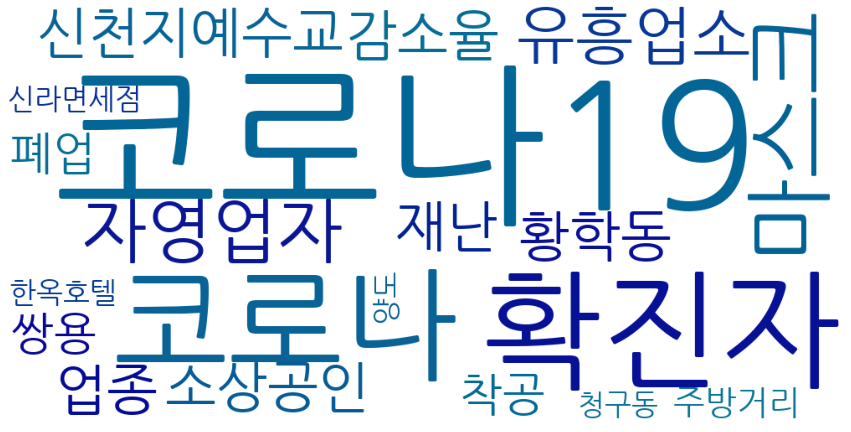

In [27]:
# 2020년, 2019년 차이에 대한 word cloud - 서울
word_counter_2020 = dict(Counter(tot_words_2020_seoul))
word_counter_2019 = dict(Counter(tot_words_2019_seoul))

# 값으로 빼기
value = { k : word_counter_2020[k] for k in set(word_counter_2020) - set(word_counter_2019) }
print(len(value), value)

# 단어 몇개 뽑을건지
n = 20
word_n = Counter(value).most_common()[:n]
word_n_key = [i[0] for i in word_n]
print(len(word_n), word_n_key)

# 워드클라우드.. 30개, 20개, 15개 알아서
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(width = 1000,
                      height = 500,
                      random_state=111,
                      font_path = font_path,
                      background_color="white",
                      max_words=25).generate_from_frequencies(dict(word_n)) # dict 형

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

206 {'들불': 1, '예비부부': 1, '혁명': 1, '질병관리본부장': 1, '위안화': 3, '농마고': 1, '대권': 1, '수성못': 2, '쌍용': 2, '긴급생계자금': 1, '회복세': 1, '공사현장': 1, '무대': 1, '정책자문단': 1, '포스코건설': 1, '수성유원지': 1, '정책자금': 1, '신매광장': 1, '홍준표': 1, '이상식': 1, '개발호재': 1, '실수요자': 1, '긴급구제': 1, '개표결과': 1, '격리': 1, '휴강': 1, '판정': 1, '주거타운': 1, 'hausD': 1, '선도경제': 1, '검사': 1, '센트럴': 1, '방역작업': 1, '교직원': 1, '중구문화원': 1, '인프라': 1, 'SPC그룹': 1, '행정복지센터': 1, '투표': 1, '비용': 1, '개학': 1, '대권주자': 1, '미래통합당': 11, '구급차': 1, '차상위계층': 1, '신축공사': 1, '전산망': 1, '물류센터': 1, '대구여성정치아카데미': 1, '방역': 2, '타월골목': 1, '반도체': 2, '가족친화마을': 1, '손소독제': 1, '공연거리': 1, '프랜차이즈': 1, '코로나': 22, '접촉자': 1, '지가지수': 2, '정의기억연대': 1, '긴급재난지원금': 2, '꽃다발': 1, '퍼스트파크': 1, '무증상': 2, '대구은행': 2, '분신': 1, '김부겸': 1, '대기업': 1, '학생': 2, '선거구': 1, '청정지역': 1, '카페': 1, '원격수업': 1, '계명대학교': 1, '기자간담회': 2, '보건소': 1, '공무원': 2, '어반': 1, '등교': 1, '공공체육시설': 1, '수성남부선': 1, '코로나19': 13, '공연': 1, '지역아동센터': 1, '소상공인시장진흥공단': 1, 'TBC': 1, '무소속': 4, '추락': 1, '방문자제': 1, '수혜지': 1, '부활절': 1, '마스크': 5, '민

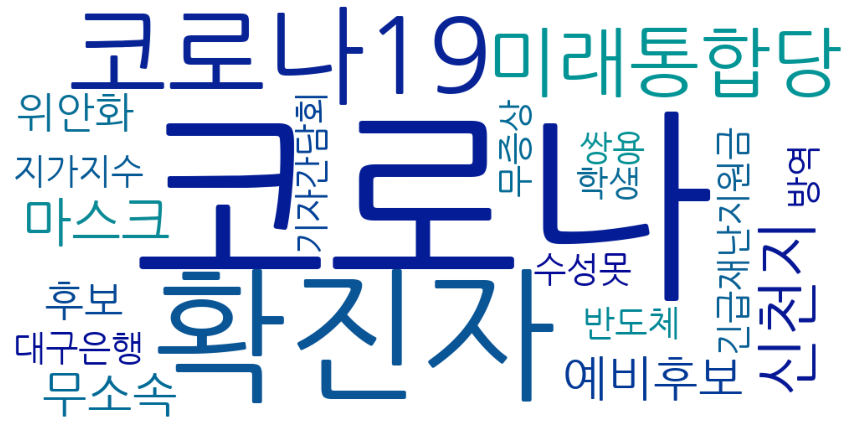

In [28]:
# 2020년, 2019년 차이에 대한 word cloud - 대구
word_counter_2020 = dict(Counter(tot_words_2020_daegu))
word_counter_2019 = dict(Counter(tot_words_2019_daegu))

# 값으로 빼기
value = { k : word_counter_2020[k] for k in set(word_counter_2020) - set(word_counter_2019) }
print(len(value), value)

# 단어 몇개 뽑을건지
n = 20
word_n = Counter(value).most_common()[:n]
word_n_key = [i[0] for i in word_n]
print(len(word_n), word_n_key)

# 워드클라우드.. 30개, 20개, 15개 알아서
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(width = 1000,
                      height = 500,
                      random_state=115,
                      font_path = font_path,
                      background_color="white",
                      max_words=25).generate_from_frequencies(dict(word_n)) # dict 형

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## (2) 유동인구(SKT) EDA
- 서울 행정동별 유동인구 YoY (Year of Year)
- 대구 행정동별 유동인구 YoY (Year of Year)
- 시도별 평일/휴일 유동인구

In [29]:
# 2020 유동인구, 2019 유동인구 EDA & 시각화
all_2020_age = pd.concat([skt_age_202002,skt_age_202003,skt_age_202004,skt_age_202005]) # 2020년 데이터
all_2019_age = pd.concat([skt_age_201902, skt_age_201903, skt_age_201904, skt_age_201905]) # 2019년 데이터
print(all_2020_age.shape, all_2019_age.shape)

# 2020 행정동별 유동인구 평균 구하기
all_2020_age["TOTAL_FLOW"] = all_2020_age.iloc[:,4:].sum(axis=1)

total_flow_2020 = all_2020_age.groupby("HDONG_NM")["TOTAL_FLOW"].agg('mean')
total_flow_2020 = total_flow_2020.reset_index()

# 2019 행정동별 유동인구 평균 구하기
all_2019_age["TOTAL_FLOW"] = all_2019_age.iloc[:,4:].sum(axis=1)

total_flow_2019 = all_2019_age.groupby("HDONG_NM")["TOTAL_FLOW"].agg('mean')
total_flow_2019 = total_flow_2019.reset_index()

print(total_flow_2020.shape, total_flow_2019.shape)

# 유동인구 YOY 2020년도 - 2019년도
total_flow_2020 = total_flow_2020.rename({'TOTAL_FLOW':'TOTAL_FLOW_20'}, axis = 'columns')
total_flow_2019 = total_flow_2019.rename({'TOTAL_FLOW':'TOTAL_FLOW_19'}, axis = 'columns')

total_flow_df = pd.merge(total_flow_2019, total_flow_2020, on = "HDONG_NM")
total_flow_df["TOTAL_FLOW_YOY"] = (total_flow_df["TOTAL_FLOW_20"] - total_flow_df["TOTAL_FLOW_19"])/total_flow_df["TOTAL_FLOW_19"]
total_flow_df

(8349, 34) (8280, 34)
(69, 2) (69, 2)


,HDONG_NM,TOTAL_FLOW_19,TOTAL_FLOW_20,TOTAL_FLOW_YOY
0,고산1동,125114.116667,113417.691488,-0.093486
1,고산2동,240015.952500,196703.366860,-0.180457
2,고산3동,51031.789833,46851.029091,-0.081925
3,공릉1동,179592.344500,148224.577603,-0.174661
4,공릉2동,200210.363000,145451.210496,-0.273508
...,...,...,...,...
64,하계2동,75631.048750,57332.233636,-0.241948
65,황금1동,55616.514083,40349.495537,-0.274505
66,황금2동,67229.769167,51827.687603,-0.229096
67,황학동,57179.277417,43936.730909,-0.231597


In [74]:
## 서울 행정동별 2019년 대비 2020년 유동인구 YOY

data = []

total_flow_nowon = total_flow_df[total_flow_df['HDONG_NM'].isin(seoul_nowon_list)]
total_flow_jung = total_flow_df[total_flow_df['HDONG_NM'].isin(seoul_jung_list)]

trace_nowon = go.Bar(
                    x = total_flow_nowon.HDONG_NM,
                    y = total_flow_nowon.TOTAL_FLOW_YOY,
                    name = "서울시 노원구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_nowon)

trace_jung = go.Bar(
                    x = total_flow_jung.HDONG_NM,
                    y = total_flow_jung.TOTAL_FLOW_YOY,
                    name = "서울시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_jung)

layout = dict(title = '서울 행정동별 유동인구 YOY',
              title_x = 0.5,
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [75]:
## 대구 행정동별 2019년 대비 2020년 유동인구 YOY

import plotly.graph_objs as go
data = []

total_flow_suseong = total_flow_df[total_flow_df['HDONG_NM'].isin(daegu_suseong_list)]
total_flow_deagu_jung = total_flow_df[total_flow_df['HDONG_NM'].isin(daegu_jung_list)]

trace_nowon = go.Bar(
                    x = total_flow_suseong.HDONG_NM,
                    y = total_flow_suseong.TOTAL_FLOW_YOY,
                    name = "대구시 수성구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_nowon)

trace_jung = go.Bar(
                    x = total_flow_deagu_jung.HDONG_NM,
                    y = total_flow_deagu_jung.TOTAL_FLOW_YOY,
                    name = "대구시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_jung)

layout = dict(title = '대구 행정동별 유동인구 YOY',
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [32]:
# 시도별 평일/휴일 유동인구 구하기
all_2020_age = all_2020_age[["STD_YMD","HDONG_NM","TOTAL_FLOW"]]
all_2020_age = all_2020_age.rename({'STD_YMD':'STD_DD'}, axis = 'columns')

# 유동인구 휴일 여부 합치기
total_flow_holiday = pd.merge(all_2020_age, holiday, on="STD_DD")

# 서울, 휴일 나누기
total_flow_holiday_seoul = total_flow_holiday[total_flow_holiday['HDONG_NM'].isin(seoul_nowon_list+seoul_jung_list)]
total_flow_holiday_daegu = total_flow_holiday[total_flow_holiday['HDONG_NM'].isin(daegu_suseong_list+daegu_jung_list)]

# 서울, 대구 휴일
seoul_holiday = total_flow_holiday_seoul.groupby("weekend")["TOTAL_FLOW"].agg('mean')
seoul_holiday = pd.DataFrame(seoul_holiday).reset_index()
daegu_holiday = total_flow_holiday_daegu.groupby("weekend")["TOTAL_FLOW"].agg('mean')
daegu_holiday = pd.DataFrame(daegu_holiday).reset_index()

# column rename
seoul_holiday = seoul_holiday.rename({'TOTAL_FLOW':'seoul_TOTAL_FLOW'}, axis = 'columns')
daegu_holiday = daegu_holiday.rename({'TOTAL_FLOW':'daegu_TOTAL_FLOW'}, axis = 'columns')

# 서울과 대구 휴일 합침
a = pd.merge(seoul_holiday, daegu_holiday, on='weekend')

seoul_holiday['weekend'] = seoul_holiday['weekend'].replace([0], '평일')
seoul_holiday['weekend'] = seoul_holiday['weekend'].replace([1], '휴일')

daegu_holiday['weekend'] = daegu_holiday['weekend'].replace([0], '평일')
daegu_holiday['weekend'] = daegu_holiday['weekend'].replace([1], '휴일')

# 서울과 대구 
a = pd.merge(seoul_holiday, daegu_holiday, on='weekend')
tset = a.T
test = tset.reset_index()

test = test.rename(columns=test.iloc[0])
test = test.drop(test.index[0])
test = test.rename({'weekend':'지역'}, axis = 'columns')
test['지역'] = test['지역'].replace(['seoul_TOTAL_FLOW'], '서울')
test['지역'] = test['지역'].replace(['daegu_TOTAL_FLOW'], '대구')
test

,지역,평일,휴일
1,서울,84750.5,61495
2,대구,54118.2,47878.1


In [33]:
# 시도별 평일/휴일 유동인구 구하기
# prepare data
weekday_df = a[a.weekend == '평일']
weekend_df = a[a.weekend == '휴일']
# create trace1 
trace1 = go.Bar(
                x = test.지역,
                y = test.평일,
                name = "평일",
                marker = dict(color = '#40a8c4'),width = 0.35)
# create trace2 
trace2 = go.Bar(
                x = test.지역,
                y = test.휴일,
                name = "휴일",
                marker = dict(color = '#07689f'),width = 0.35)
data = [trace1, trace2]
layout = go.Layout(barmode = "group", width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## (3) 카드(신한카드) EDA
- 서울 행정동별 카드매출 YOY
- 대구 행정동별 카드매출 YOY
- 서울 업종별 카드매출 YOY
- 대구 업종별 카드매출 YOY

In [34]:
print(card_re.shape)
print(card_fo.shape)
print(card.shape)

(2537753, 8)
(238829, 7)
(2776582, 11)


In [35]:
# card si data만들기

card_2020_dong = card[card['STD_DD']>=20200101] #2020년
card_2019_dong = card[card['STD_DD']<20200101] #2019년

card_2020_dong["SI_NM"] = "name"
card_2019_dong["SI_NM"] = "name"

# 2020, 2019 - 시 이름 변수 만들기
card_2020_dong.loc[card_2020_dong['GU_NM'] == "대구 중구", 'SI_NM'] = "대구"
card_2020_dong.loc[card_2020_dong['GU_NM'] == "대구 수성구", 'SI_NM'] = "대구"
card_2020_dong.loc[card_2020_dong['GU_NM'] == "서울 노원구", 'SI_NM'] = "서울"
card_2020_dong.loc[card_2020_dong['GU_NM'] == "서울 중구", 'SI_NM'] = "서울"

card_2019_dong.loc[card_2019_dong['GU_NM'] == "대구 중구", 'SI_NM'] = "대구"
card_2019_dong.loc[card_2019_dong['GU_NM'] == "대구 수성구", 'SI_NM'] = "대구"
card_2019_dong.loc[card_2019_dong['GU_NM'] == "서울 노원구", 'SI_NM'] = "서울"
card_2019_dong.loc[card_2019_dong['GU_NM'] == "서울 중구", 'SI_NM'] = "서울"

card_2020_dong = card_2020_dong.groupby("HDONG_NM")["USE_AMT"].agg('sum')
card_2020_dong = card_2020_dong.reset_index()

card_2019_dong = card_2019_dong.groupby("HDONG_NM")["USE_AMT"].agg('sum')
card_2019_dong = card_2019_dong.reset_index()

# AMT 이름 변경
card_2020_dong = card_2020_dong.rename({'USE_AMT':'USE_AMT_20'}, axis = 'columns')
card_2019_dong = card_2019_dong.rename({'USE_AMT':'USE_AMT_19'}, axis = 'columns')

# YOY 만들기
card_dong_YOY = pd.merge(card_2019_dong, card_2020_dong, on="HDONG_NM")
card_dong_YOY["USE_AMT_YOY"] = (card_dong_YOY["USE_AMT_20"] - card_dong_YOY["USE_AMT_19"])/card_dong_YOY["USE_AMT_19"]

card_dong_YOY


,HDONG_NM,USE_AMT_19,USE_AMT_20,USE_AMT_YOY
0,고산1동,38739106.0,30929258.0,-0.201601
1,고산2동,41547369.0,32913674.0,-0.207804
2,고산3동,28491873.0,24317748.0,-0.146502
3,공릉1동,70485598.0,68727272.0,-0.024946
4,공릉2동,54529314.0,47927604.0,-0.121067
...,...,...,...,...
64,하계2동,6633048.0,6783929.0,0.022747
65,황금1동,6298039.0,5849735.0,-0.071182
66,황금2동,37949667.0,35863903.0,-0.054961
67,황학동,42072808.0,42452917.0,0.009035


In [36]:
card_dong_YOY[card_dong_YOY['HDONG_NM']=='신당5동']

,HDONG_NM,USE_AMT_19,USE_AMT_20,USE_AMT_YOY
44,신당5동,16461414.0,16459203.0,-0.000134


In [76]:
## 서울 동별 19년도 대비 20년도 카드 매출(USE_AMT) YOY

import plotly.graph_objs as go
data = []

card_nowon = card_dong_YOY[card_dong_YOY['HDONG_NM'].isin(seoul_nowon_list)]
card_jung = card_dong_YOY[card_dong_YOY['HDONG_NM'].isin(seoul_jung_list)]

trace_nowon = go.Bar(
                    x = card_nowon.HDONG_NM,
                    y = card_nowon.USE_AMT_YOY,
                    name = "서울시 노원구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_nowon)

trace_jung = go.Bar(
                    x = card_jung.HDONG_NM,
                    y = card_jung.USE_AMT_YOY,
                    name = "서울시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_jung)

layout = dict(title = '서울시 카드 YOY',
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [77]:
## 대구 동별 19년도 대비 20년도 카드 매출(USE_AMT) YOY

import plotly.graph_objs as go
data = []

card_suseong = card_dong_YOY[card_dong_YOY['HDONG_NM'].isin(daegu_suseong_list)]
card_daegu_jung = card_dong_YOY[card_dong_YOY['HDONG_NM'].isin(daegu_jung_list)]

trace_suseong = go.Bar(
                    x = card_suseong.HDONG_NM,
                    y = card_suseong.USE_AMT_YOY,
                    name = "대구시 수성구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_suseong)

trace_daegu_jung = go.Bar(
                    x = card_daegu_jung.HDONG_NM,
                    y = card_daegu_jung.USE_AMT_YOY,
                    name = "대구시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_daegu_jung)

layout = dict(title = '대구시 카드 YOY',
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

업종별 YOY

In [39]:
x = {'숙박':10, '레저용품':20, '레저업소':21, '문화취미':22, '가구':30, '전기':31, '주방용구':32,
     '연료판매':33, '광학제품':34, '가전':35, '유통업':40, '의복':42, '작물':43, '신변잡화':44,
     '서적문구':50, '사무통신':52,'자동차판매':60,'자동차정비':62, '의료기관':70, '보건위생':71, '요식업소':80,
     '음료식품':81, '수리서비스':92}

card_2020_type = card[card['STD_DD']>=20200101] #2020년
card_2019_type = card[card['STD_DD']<20200101] #2019년

card_2020_type["SI_NM"] = "name"
card_2019_type["SI_NM"] = "name"

# 2020, 2019 - 시 이름 변수 만들기
card_2020_type.loc[card_2020_type['GU_NM'] == "대구 중구", 'SI_NM'] = "대구"
card_2020_type.loc[card_2020_type['GU_NM'] == "대구 수성구", 'SI_NM'] = "대구"
card_2020_type.loc[card_2020_type['GU_NM'] == "서울 노원구", 'SI_NM'] = "서울"
card_2020_type.loc[card_2020_type['GU_NM'] == "서울 중구", 'SI_NM'] = "서울"

card_2019_type.loc[card_2019_type['GU_NM'] == "대구 중구", 'SI_NM'] = "대구"
card_2019_type.loc[card_2019_type['GU_NM'] == "대구 수성구", 'SI_NM'] = "대구"
card_2019_type.loc[card_2019_type['GU_NM'] == "서울 노원구", 'SI_NM'] = "서울"
card_2019_type.loc[card_2019_type['GU_NM'] == "서울 중구", 'SI_NM'] = "서울"

for key, value in x.items():
  card_2020_type.loc[card_2020_type['MCT_CAT_CD'] == value, 'MCT_CAT_CD'] = key

for key, value in x.items():
  card_2019_type.loc[card_2019_type['MCT_CAT_CD'] == value, 'MCT_CAT_CD'] = key

# 서울과 대구 나누기 20,19
card_2020_seoul = card_2020_type[(card_2020_type.SI_NM == "서울")]
card_2020_daegu = card_2020_type[(card_2020_type.SI_NM == "대구")]

card_2019_seoul = card_2019_type[(card_2019_type.SI_NM == "서울")]
card_2019_daegu = card_2019_type[(card_2019_type.SI_NM == "대구")]

# useamt로 sum, 업종별로 묶기
card_2020_seoul_CAT = card_2020_seoul.groupby("MCT_CAT_CD")["USE_AMT"].agg('sum')
card_2020_seoul_CAT = card_2020_seoul_CAT.reset_index()

card_2020_daegu_CAT = card_2020_daegu.groupby("MCT_CAT_CD")["USE_AMT"].agg('sum')
card_2020_daegu_CAT = card_2020_daegu_CAT.reset_index()

card_2019_seoul_CAT = card_2019_seoul.groupby("MCT_CAT_CD")["USE_AMT"].agg('sum')
card_2019_seoul_CAT = card_2019_seoul_CAT.reset_index()

card_2019_daegu_CAT = card_2019_daegu.groupby("MCT_CAT_CD")["USE_AMT"].agg('sum')
card_2019_daegu_CAT = card_2019_daegu_CAT.reset_index()

# rename
card_2020_seoul_CAT = card_2020_seoul_CAT.rename({'USE_AMT':'USE_AMT_20_seoul'}, axis = 'columns')
card_2020_daegu_CAT = card_2020_daegu_CAT.rename({'USE_AMT':'USE_AMT_20_daegu'}, axis = 'columns')

card_2019_seoul_CAT = card_2019_seoul_CAT.rename({'USE_AMT':'USE_AMT_19_seoul'}, axis = 'columns')
card_2019_daegu_CAT = card_2019_daegu_CAT.rename({'USE_AMT':'USE_AMT_19_daegu'}, axis = 'columns')

# 2019, 2020 합치기, 서울 대구 각각
card_seoul_CAT_YOY = pd.merge(card_2019_seoul_CAT, card_2020_seoul_CAT, on="MCT_CAT_CD")
card_daegu_CAT_YOY = pd.merge(card_2019_daegu_CAT, card_2020_daegu_CAT, on="MCT_CAT_CD")

card_seoul_CAT_YOY["USE_AMT_seoul_YOY"] = (card_seoul_CAT_YOY["USE_AMT_20_seoul"] - card_seoul_CAT_YOY["USE_AMT_19_seoul"])/card_seoul_CAT_YOY["USE_AMT_19_seoul"]
card_daegu_CAT_YOY["USE_AMT_daegu_YOY"] = (card_daegu_CAT_YOY["USE_AMT_20_daegu"] - card_daegu_CAT_YOY["USE_AMT_19_daegu"])/card_daegu_CAT_YOY["USE_AMT_19_daegu"]

card_seoul_CAT_YOY

,MCT_CAT_CD,USE_AMT_19_seoul,USE_AMT_20_seoul,USE_AMT_seoul_YOY
0,가구,4.426763e+06,5218134.0,0.178770
1,가전,2.640202e+07,19656036.0,-0.255510
2,광학제품,5.927367e+06,4386286.0,-0.259994
3,레저업소,3.762224e+07,29833607.0,-0.207022
4,레저용품,1.032797e+08,70269536.0,-0.319619
5,문화취미,9.817943e+06,7509168.0,-0.235159
6,보건위생,1.162503e+08,64710229.0,-0.443354
7,사무통신,3.322893e+07,27724716.0,-0.165645
8,서적문구,2.487003e+07,17815811.0,-0.283643
9,수리서비스,4.724062e+06,5043903.0,0.067705


In [78]:
import plotly.graph_objs as go
data = []

trace_seoul = go.Bar(
                    x = card_seoul_CAT_YOY.MCT_CAT_CD,
                    y = card_seoul_CAT_YOY.USE_AMT_seoul_YOY,
                    name = "서울",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_seoul)

layout = dict(title = '서울 업종별 YOY',
              title_x=0.5,
              xaxis = dict(title= '업종',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [79]:
import plotly.graph_objs as go
data = []

trace_seoul = go.Bar(
                    x = card_daegu_CAT_YOY.MCT_CAT_CD,
                    y = card_daegu_CAT_YOY.USE_AMT_daegu_YOY,
                    name = "대구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_seoul)

layout = dict(title = '대구 업종별 YOY',
              title_x=0.5,
              xaxis = dict(title= '업종',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## (4) 편의점(GS리테일) EDA
- 서울 행정동별 편의점 매출지수 YOY
- 대구 행정동별 편의점 매출지수 YOY
- 서울 편의점 품목별 매출 비중 YOY
- 대구 편의점 품목별 매출 비중 YOY

In [42]:
gs_row_2019 = gs_row[gs_row['OPER_DT'] < 20200101] #2019년
gs_row_2020 = gs_row[gs_row['OPER_DT'] > 20200101] #2020년
print(gs_row_2019.shape, gs_row_2020.shape)

# 매출지수 평균
gs_2019_dong = gs_row_2019.groupby("ADMD")["AMT_IND"].agg('mean')
gs_2019_dong = gs_2019_dong.reset_index()

gs_2020_dong = gs_row_2020.groupby("ADMD")["AMT_IND"].agg('mean')
gs_2020_dong = gs_2020_dong.reset_index()

# rename
gs_2019_dong = gs_2019_dong.rename({'AMT_IND':'AMT_IND_19'}, axis = 'columns')
gs_2020_dong = gs_2020_dong.rename({'AMT_IND':'AMT_IND_20'}, axis = 'columns')

gs_dong_YOY = pd.merge(gs_2019_dong, gs_2020_dong, on="ADMD")

# 2019와 2020 YOY
gs_dong_YOY["AMT_IND_YOY"] = (gs_dong_YOY["AMT_IND_20"] - gs_dong_YOY["AMT_IND_19"])/gs_dong_YOY["AMT_IND_19"]

(7200, 13) (7260, 13)


In [80]:
## 서울 동별 19년도 대비 20년도 편의점 매출 지수(AMT_IND) YOY

import plotly.graph_objs as go
data = []

gs_nowon = gs_dong_YOY[gs_dong_YOY['ADMD'].isin(seoul_nowon_list)]
gs_jung = gs_dong_YOY[gs_dong_YOY['ADMD'].isin(seoul_jung_list)]

trace_nowon = go.Bar(
                    x = gs_nowon.ADMD,
                    y = gs_nowon.AMT_IND_YOY,
                    name = "서울시 노원구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_nowon)

trace_jung = go.Bar(
                    x = gs_jung.ADMD,
                    y = gs_jung.AMT_IND_YOY,
                    name = "서울시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_jung)

layout = dict(title = '서울시 편의점 매출 지수 YOY',
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [81]:
## 대구 동별 19년도 대비 20년도 편의점 매출 지수(AMT_IND) YOY

import plotly.graph_objs as go
data = []

gs_suseong = gs_dong_YOY[gs_dong_YOY['ADMD'].isin(daegu_suseong_list)]
gs_daegu_jung = gs_dong_YOY[gs_dong_YOY['ADMD'].isin(daegu_jung_list)]

trace_suseong = go.Bar(
                    x = gs_suseong.ADMD,
                    y = gs_suseong.AMT_IND_YOY,
                    name = "대구시 수성구",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_suseong)

trace_daegu_jung = go.Bar(
                    x = gs_daegu_jung.ADMD,
                    y = gs_daegu_jung.AMT_IND_YOY,
                    name = "대구시 중구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_daegu_jung)

layout = dict(title = '대구시 편의점 매출 지수 YOY',
              xaxis = dict(title= '행정동',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [45]:
# 품목별 매출 지수 YOY
# conversion_col = gs_row_2020.columns[5:]

# 19년 절대지수, 20년 절대지수
gs_row_2019["식사"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_10_P"]
gs_row_2019["간식"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_20_P"]
gs_row_2019["마실거리"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_30_P"]
gs_row_2019["홈&리빙"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_40_P"]
gs_row_2019["헬스&뷰티"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_50_P"]
gs_row_2019["취미&여가"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_60_P"]
gs_row_2019["사회활동"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_70_P"]
gs_row_2019["임신/육아"] = gs_row_2019["AMT_IND"] * gs_row_2019["LCLS_80_P"]

gs_row_2020["식사"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_10_P"]
gs_row_2020["간식"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_20_P"]
gs_row_2020["마실거리"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_30_P"]
gs_row_2020["홈&리빙"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_40_P"]
gs_row_2020["헬스&뷰티"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_50_P"]
gs_row_2020["취미&여가"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_60_P"]
gs_row_2020["사회활동"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_70_P"]
gs_row_2020["임신/육아"] = gs_row_2020["AMT_IND"] * gs_row_2020["LCLS_80_P"]

# 지역 변수로 구분
gs_2020_seoul = gs_row_2020[(gs_row_2020.PVN == "서울특별시")]
gs_2020_daegu = gs_row_2020[(gs_row_2020.PVN == "대구광역시")]

gs_2019_seoul = gs_row_2019[(gs_row_2019.PVN == "서울특별시")]
gs_2019_daegu = gs_row_2019[(gs_row_2019.PVN == "대구광역시")]

# 2020, 2019, 서울, 대구 평균
gs_2020_seoul = gs_2020_seoul.iloc[:,-8:].mean()
gs_2020_seoul = pd.DataFrame(gs_2020_seoul)
gs_2020_seoul = gs_2020_seoul.reset_index()
gs_2020_seoul.columns = ["category", "seoul_2020"]

gs_2020_daegu = gs_2020_daegu.iloc[:,-8:].mean()
gs_2020_daegu = pd.DataFrame(gs_2020_daegu)
gs_2020_daegu = gs_2020_daegu.reset_index()
gs_2020_daegu.columns = ["category", "daegu_2020"]

gs_2019_seoul = gs_2019_seoul.iloc[:,-8:].mean()
gs_2019_seoul = pd.DataFrame(gs_2019_seoul)
gs_2019_seoul = gs_2019_seoul.reset_index()
gs_2019_seoul.columns = ["category", "seoul_2019"]

gs_2019_daegu = gs_2019_daegu.iloc[:,-8:].mean()
gs_2019_daegu = pd.DataFrame(gs_2019_daegu)
gs_2019_daegu = gs_2019_daegu.reset_index()
gs_2019_daegu.columns = ["category", "daegu_2019"]

# YOY Merge
gs_seoul_YOY = pd.merge(gs_2019_seoul, gs_2020_seoul, on = "category")
gs_daegu_YOY = pd.merge(gs_2019_daegu, gs_2020_daegu, on = "category")

# YOY 값 만들기
gs_seoul_YOY["category_YOY"] = (gs_seoul_YOY["seoul_2020"] - gs_seoul_YOY["seoul_2019"])/gs_seoul_YOY["seoul_2019"]
gs_daegu_YOY["category_YOY"] = (gs_daegu_YOY["daegu_2020"] - gs_daegu_YOY["daegu_2019"])/gs_daegu_YOY["daegu_2019"]

In [82]:
import plotly.graph_objs as go
data = []

trace_seoul = go.Bar(
                    x = gs_seoul_YOY.category,
                    y = gs_seoul_YOY.category_YOY,
                    name = "서울",
                    marker = dict(color = '#40a8c4')
                    )
data.append(trace_seoul)

layout = dict(title = '서울 편의점 품목별 YOY',
              title_x=0.5,
              xaxis = dict(title= '품목',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [83]:
import plotly.graph_objs as go
data = []

trace_daegu = go.Bar(
                    x = gs_daegu_YOY.category,
                    y = gs_daegu_YOY.category_YOY,
                    name = "대구",
                    marker = dict(color = '#07689f')
                    )
data.append(trace_daegu)

layout = dict(title = '대구 편의점 품목별 YOY',
              title_x=0.5,
              xaxis = dict(title= '품목',ticklen= 5,zeroline= False),
              yaxis = dict(title="YOY"),
              width=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## (5) 전처리 - 코로나 인식 시차 조정

In [48]:
# 코로나 누적 확진자 수 데이터 import
daily=pd.read_csv("/content/drive/My Drive/big_contest/corona/kr_daily.csv")
daily_all_diff=daily[['date','confirmed']].copy()

# 1.차분 2.인식 시차 조정 함수
def covid_func(data):
  data['confirmed']=data['confirmed']-data['confirmed'].shift(1)
  data['confirmed']=data['confirmed'].shift(1)
  return data
daily = covid_func(daily)[['date','confirmed']]

#타 데이터와 데이터 기간을 맞춰줌
daily=daily[(daily.date>20200131) & (daily.date<20200601)]
daily

,date,confirmed
11,20200201,4.0
12,20200202,1.0
13,20200203,3.0
14,20200204,0.0
15,20200205,1.0
...,...,...
127,20200527,19.0
128,20200528,40.0
129,20200529,79.0
130,20200530,58.0


In [49]:
# 차분만 실시한 데이터 생성
daily_all_diff['confirmed']=daily_all_diff['confirmed']-daily_all_diff['confirmed'].shift(1)
daily_all_diff=daily_all_diff[(daily_all_diff.date>20200131) & (daily_all_diff.date<20200601)]
daily_all_diff

,date,confirmed
11,20200201,1.0
12,20200202,3.0
13,20200203,0.0
14,20200204,1.0
15,20200205,5.0
...,...,...
127,20200527,40.0
128,20200528,79.0
129,20200529,58.0
130,20200530,39.0


In [50]:
#날짜를 수치에서 데이트타임으로 변환
import datetime
daily['date'] = daily['date'].astype(str)
daily_all_diff['date'] =daily_all_diff['date'].astype(str)

for i in range(len(daily_all_diff)):
  daily_all_diff.iloc[i,0]=datetime.datetime.strptime(daily_all_diff.iloc[i,0],'%Y%m%d')

for i in range(len(daily)):
  daily.iloc[i,0]=datetime.datetime.strptime(daily.iloc[i,0],'%Y%m%d')

daily

,date,confirmed
11,2020-02-01 00:00:00,4.0
12,2020-02-02 00:00:00,1.0
13,2020-02-03 00:00:00,3.0
14,2020-02-04 00:00:00,0.0
15,2020-02-05 00:00:00,1.0
...,...,...
127,2020-05-27 00:00:00,19.0
128,2020-05-28 00:00:00,40.0
129,2020-05-29 00:00:00,79.0
130,2020-05-30 00:00:00,58.0


In [51]:
daily_all_diff

,date,confirmed
11,2020-02-01 00:00:00,1.0
12,2020-02-02 00:00:00,3.0
13,2020-02-03 00:00:00,0.0
14,2020-02-04 00:00:00,1.0
15,2020-02-05 00:00:00,5.0
...,...,...
127,2020-05-27 00:00:00,40.0
128,2020-05-28 00:00:00,79.0
129,2020-05-29 00:00:00,58.0
130,2020-05-30 00:00:00,39.0


In [84]:
# 시차조정 이전 데이터와 시차조정 이후 데이터 비교
data=[]
one=go.Scatter(x=daily.date, y=daily.confirmed,
                    mode='lines',
                    name='시차 조정ㅇ',
                    marker=dict(color='#40a8c4'))
two=go.Scatter(x=daily_all_diff.date, y=daily_all_diff.confirmed,
                    mode='lines',
                    name='시차 조정 X',
                    marker=dict(color='#07689f'))
data.append(two)
data.append(one)

layout = dict(title = '시차 조정 비교 그래프',
              xaxis = dict(title= '날짜',ticklen= 5,zeroline= False),
              yaxis = dict(title="일일 코로나 확진자수"),
              width=900,
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )
fig = dict(data = data, layout = layout)
pyo.iplot(fig)

## (6) POC 코로나 확진자 수와 카드 매출 추이

In [53]:
# 2019년도 카드 데이터 52주 조정 과정
card_2020_poc = card_2020.copy()
card_2019_poc = card_2019.copy()
card_2019_poc['STD_DD'] = pd.to_datetime(card_2019_poc['STD_DD'], format='%Y%m%d', errors='raise')
card_2019_poc['STD_DD'] = pd.DatetimeIndex(card_2019_poc['STD_DD']) + timedelta(weeks=52)
card_2019_poc['STD_DD'] = card_2019_poc['STD_DD'].astype(str)
card_2019_poc["STD_DD"] = card_2019_poc["STD_DD"].astype(str)
card_2019_poc["STD_DD"] = card_2019_poc["STD_DD"].str.replace("-","")
card_2019_poc["STD_DD"] = card_2019_poc["STD_DD"].astype(int)

# amt 이름 변경
card_2019_poc = card_2019_poc.rename({'USE_AMT':'USE_AMT_19'}, axis = 'columns')
card_2020_poc = card_2020_poc.rename({'USE_AMT':'USE_AMT_20'}, axis = 'columns')

#2019 카드 데이터와 2020 카드 데이터 병합
card_poc = pd.merge(card_2019_poc, card_2020_poc, on=['HDONG_NM','STD_DD', 'GU_NM'])

#구를 제외한 시 이름만 추출
for i in range(len(card_poc)):
  card_poc.GU_NM[i]=card_poc.GU_NM[i][:2]


#시별 해당 일의 매출액 평균으로 집계
card_poc=card_poc.groupby(["STD_DD",'GU_NM'],as_index=False)[['USE_AMT_19','USE_AMT_20']].agg("mean")

card_poc

,STD_DD,GU_NM,USE_AMT_19,USE_AMT_20
0,20200201,대구,421191.542857,315875.600000
1,20200201,서울,808977.294118,689901.500000
2,20200202,대구,318283.600000,200560.371429
3,20200202,서울,586851.852941,494148.941176
4,20200203,대구,263328.714286,249083.828571
...,...,...,...,...
233,20200527,서울,829007.911765,660114.617647
234,20200528,대구,260350.114286,241886.714286
235,20200528,서울,812140.705882,678208.852941
236,20200529,대구,321793.885714,289571.114286


In [54]:
# 코로나
covid_poc = covid.copy()
covid_poc.columns=['STD_DD','confirmed']

# 일일 신규 코로나 확진자 수 붙이기
card_poc=pd.merge(card_poc,covid_poc, on='STD_DD')

# 시별로 카드 데이터 분리
card_poc_daegu=card_poc[card_poc.GU_NM=='대구']
card_poc_seoul=card_poc[card_poc.GU_NM=='서울']

print(card_poc_daegu.shape)
print(card_poc_seoul.shape)

card_poc_daegu.index=range(len(card_poc_daegu))
card_poc_seoul.index=range(len(card_poc_seoul))

#서울 대구 별로 일주일 평균데이터 생성(일주일 평균을 통해 휴일과 평일의 카드 매출액 차이를 보완하고 추이를 더 잘 파악하기 위함)
week_card_seoul=[]
week_card_seoul=pd.DataFrame(week_card_seoul)
for i,n in enumerate(range(0,119, 7)):
  week_card_seoul.loc[i,'STD_DD']=card_poc_seoul.loc[n,'STD_DD']
  week_card_seoul.loc[i,'USE_AMT_19']=card_poc_seoul.loc[n:n+6,'USE_AMT_19'].mean()
  week_card_seoul.loc[i,'USE_AMT_20']=card_poc_seoul.loc[n:n+6,'USE_AMT_20'].mean()
  week_card_seoul.loc[i,'covid']=card_poc_seoul.loc[n:n+6,'confirmed'].mean()
  week_card_seoul.loc[i,'GU_NM']=card_poc_seoul.loc[n,'GU_NM']

week_card_daegu=[]
week_card_daegu=pd.DataFrame(week_card_daegu)
for i,n in enumerate(range(0,119, 7)):
  week_card_daegu.loc[i,'STD_DD']=card_poc_daegu.loc[n,'STD_DD']
  week_card_daegu.loc[i,'USE_AMT_19']=card_poc_daegu.loc[n:n+6,'USE_AMT_19'].mean()
  week_card_daegu.loc[i,'USE_AMT_20']=card_poc_daegu.loc[n:n+6,'USE_AMT_20'].mean()
  week_card_daegu.loc[i,'covid']=card_poc_daegu.loc[n:n+6,'confirmed'].mean()
  week_card_daegu.loc[i,'GU_NM']=card_poc_daegu.loc[n,'GU_NM'] 

#날짜를 숫자에서 데이트타임으로 변환
import datetime
week_card_daegu['STD_DD'] = week_card_daegu['STD_DD'].astype(str)
week_card_seoul['STD_DD'] = week_card_seoul['STD_DD'].astype(str)
for i in range(len(week_card_daegu)):
  week_card_daegu.iloc[i,0]=week_card_daegu.iloc[i,0][:8]
  week_card_daegu.iloc[i,0]=datetime.datetime.strptime(week_card_daegu.iloc[i,0],'%Y%m%d')
  week_card_seoul.iloc[i,0]=week_card_seoul.iloc[i,0][:8]
  week_card_seoul.iloc[i,0]=datetime.datetime.strptime(week_card_seoul.iloc[i,0],'%Y%m%d')  

print(week_card_seoul.shape)
print(week_card_daegu.shape)


(119, 5)
(119, 5)
(17, 5)
(17, 5)


In [85]:
# 일일 신규 코로나 확진자 수와 카드 매출액 추이 그래프

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=week_card_seoul.STD_DD, y=week_card_seoul.USE_AMT_19,
                    mode='lines',
                    name='서울 2019 카드 매출액 추이',
                    marker=dict(color='#40a8c4')), secondary_y=False)

fig.add_trace(go.Scatter(x=week_card_seoul.STD_DD, y=week_card_seoul.USE_AMT_20,
                    mode='lines',
                    name='서울 2020 카드 매출액 추이',
                    marker=dict(color='#07689f')), secondary_y=False)

fig.add_trace(go.Scatter(x=week_card_daegu.STD_DD, y=week_card_daegu.USE_AMT_19,
                    mode='lines',
                    name='대구 2019 카드 매출액 추이',
                    marker=dict(color='#bc7ad6')), secondary_y=False)

fig.add_trace(go.Scatter(x=week_card_daegu.STD_DD, y=week_card_daegu.USE_AMT_20,
                    mode='lines',
                    name='대구 2020 카드 매출액 추이',
                    marker=dict(color='#8031a0')), secondary_y=False)

fig.add_trace(go.Scatter(x=week_card_daegu.STD_DD, y=week_card_daegu.covid,
                    mode='lines',
                    name='신규 코로나 확진자 추이',
                    marker=dict(color='red')), secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="코로나 확산세와 경기 회복"
)

# Set x-axis title
fig.update_xaxes(title_text="날짜")

# Set y-axes titles
fig.update_yaxes(title_text="카드 매출액", secondary_y=False)
fig.update_yaxes(title_text="신규 코로나 확진자 수", secondary_y=True)

fig.show()

# 2.군집 정의
- 2019 데이터로 지역적 특징, 통계적 특징 등을 이용하여 지역 군집을 나눈다. 
- <b>2019 데이터 사용 이유는 기존 지역별 특성을 보기 위함(2020 대신 2019 선택 이유)</b>

- 사용 데이터 
  - 카드 2019, 유동인구 2019, 거주인구 2019

- 기준 (파생변수)
  - 유동인구 유입률 = (유동인구/거주인구) (X축)
  - 1인당 카드 구매력(사용횟수) (카드건수 / (유동인구+거주인구)) (Y축)

- 순서
  - (1) 데이터 전처리 & XY축 만들기
  - (2) 동별 각 축 기준 Rank Standardization
  - (3) 시·구별 시각화 
  - (4) KMeans 군집화
  - (5) 각 군집별 시각화 (서울, 대구 구분)
  - (6) 최종 군집 결과 (서울 4개, 대구 4개)
  
- <b>각 구별로 특색은 있지만 기준(XY)에 따라 여러 곳에 나눠져 있음을 알 수 있음 </b>
- <b>기준 축별로 군집알고리즘을 통해 재분류 및 상권중심, 주거, 주거상권중심, 교통중심지역 군집이름 라벨링</b>

-  군집별 이름
  - 오른쪽상단 : 상권지역
  - 왼쪽상단 : 주거상권지역
  - 왼쪽하단 : 주거지역
  - 오른쪽하단 : 교통중심지역



## (1) 데이터 전처리 & XY축 만들기

In [56]:
# 기준 축 만들기 (X축)
# 2019 유동인구 데이터 
skt_2019_cluster = skt_2019.groupby('HDONG_NM').agg('mean')
skt_2019_cluster = skt_2019_cluster.reset_index()
skt_2019_cluster = skt_2019_cluster[["HDONG_NM","sum_19"]]

# 2019 거주인구 데이터
# 2월 ~ 5월 평균 거주인구 - RESI_POP
resi_pop_2019['RESI_POP'] = (resi_pop_2019['201902']+resi_pop_2019['201903']+resi_pop_2019['201904']+resi_pop_2019['201905'])/4
resi_pop_2019 = resi_pop_2019[['HDONG_NM','RESI_POP']]

# Card 2019 사용 데이터
card_2019_group = card_2019.groupby('HDONG_NM')['USE_CNT'].agg('sum')
card_2019_group = card_2019_group.reset_index()

# 거주인구 & 유동인구 merge
pop_2019 = pd.merge(resi_pop_2019, skt_2019_cluster, on="HDONG_NM")

# 카드 데이터 merge
cluster_19 = pd.merge(card_2019_group, pop_2019, on='HDONG_NM')

print(cluster_19.shape)
cluster_19

(69, 4)


,HDONG_NM,USE_CNT,RESI_POP,sum_19
0,고산1동,1673336,32617.00,125114.116667
1,고산2동,1377366,27338.25,240015.952500
2,고산3동,1277089,35226.00,51031.789833
3,공릉1동,3171749,38925.75,179592.344500
4,공릉2동,3489452,40813.00,200210.363000
...,...,...,...,...
64,하계2동,551393,23642.50,75631.048750
65,황금1동,354010,24997.75,55616.514083
66,황금2동,747128,11833.25,67229.769167
67,황학동,1368420,12554.75,57179.277417


In [57]:
# 기준 축 만들기 - X축, Y축

# 거주인구대비 유동인구 비율 (X축)
cluster_19["ratio"] = cluster_19['sum_19'] / cluster_19['RESI_POP']

# 카드 구매력 (Y축)
cluster_19['PURCH_POWER'] = cluster_19['USE_CNT']/(cluster_19['RESI_POP']+cluster_19['sum_19'])

# 최종 클러스터 구분용 데이터
cluster_19 = cluster_19[["HDONG_NM","ratio","PURCH_POWER"]]
cluster_19

,HDONG_NM,ratio,PURCH_POWER
0,고산1동,3.835856,10.608788
1,고산2동,8.779492,5.151840
2,고산3동,1.448697,14.805492
3,공릉1동,4.613716,14.514812
4,공릉2동,4.905554,14.477650
...,...,...,...
64,하계2동,3.198945,5.554279
65,황금1동,2.224861,4.391406
66,황금2동,5.681429,9.449778
67,황학동,4.554394,19.623418


## (2) 동별 각 축 기준 Rank Standardization
- 서울과 대구 Cluster 분리
- X축, Y축 Rank Standarization

In [58]:
# 서울 cluster와 대구 cluster로 분리
seoul_cluster_19 = cluster_19[cluster_19['HDONG_NM'].isin(seoul_nowon_list + seoul_jung_list)] # 서울 지역
daegu_cluster_19 = cluster_19[cluster_19['HDONG_NM'].isin(daegu_suseong_list + daegu_jung_list)] # 대구 지역

# reset index
seoul_cluster_19 = seoul_cluster_19.reset_index(drop=True)
daegu_cluster_19 = daegu_cluster_19.reset_index(drop=True)

seoul_cluster_19_row = seoul_cluster_19.copy()
daegu_cluster_19_row = daegu_cluster_19.copy()

In [59]:

# rank 화 작업
seoul_rank = seoul_cluster_19.iloc[:,1:].rank()
daegu_rank = daegu_cluster_19.iloc[:,1:].rank()

# rank 작업 후 DataFrame 으로
seoul_dong = pd.DataFrame(seoul_cluster_19["HDONG_NM"])
daegu_dong = pd.DataFrame(daegu_cluster_19["HDONG_NM"])

# 행정동 & Rank join
seoul_cluster_19 = seoul_dong.join(seoul_rank)
daegu_cluster_19 = daegu_dong.join(daegu_rank)

print(seoul_cluster_19.shape, daegu_cluster_19.shape)

# 서울 cluster 예시
seoul_cluster_19.head(10)

(34, 3) (35, 3)


,HDONG_NM,ratio,PURCH_POWER
0,공릉1동,22.0,12.0
1,공릉2동,25.0,11.0
2,광희동,30.0,21.0
3,다산동,24.0,9.0
4,동화동,9.0,27.0
5,명동,34.0,32.0
6,상계10동,12.0,2.0
7,상계1동,14.0,25.0
8,상계2동,19.0,33.0
9,상계3.4동,8.0,3.0


In [60]:
# 대구 clsuter 예시
daegu_cluster_19.head(10)

,HDONG_NM,ratio,PURCH_POWER
0,고산1동,15.0,21.0
1,고산2동,30.0,6.0
2,고산3동,1.0,28.0
3,남산1동,32.0,9.0
4,남산2동,33.0,5.0
5,남산3동,3.0,14.0
6,남산4동,7.0,19.0
7,대봉1동,31.0,20.0
8,대봉2동,9.0,7.0
9,대신동,26.0,23.0


## (3) 시·구별 시각화
- 각 구별로 특색은 있지만 기준(XY)에 따라 여러 곳에 나눠져 있음을 알 수 있음 
- 기준 축별로 군집알고리즘을 통해 재분류 및 상권중심, 주거, 교통중심,주거상권 군집이름 라벨링
- Rank Standarization 전 후 시각화

In [61]:
# 시각화용 import
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
plotly.io.renderers.default = 'colab' # colab에서 plotly가 돌아가기 위해

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()

%matplotlib inline
plt.rc('font', family=font_name) #글씨체 설정
fm._rebuild()

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 144694 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [86]:
# 서울 전체 시각화 (구 구분없이)
# creating trace1
seoul_cluster_19_row_nowon = seoul_cluster_19_row[seoul_cluster_19_row['HDONG_NM'].isin(seoul_nowon_list)]
seoul_cluster_19_row_jung = seoul_cluster_19_row[seoul_cluster_19_row['HDONG_NM'].isin(seoul_jung_list)]

trace1 =go.Scatter( x = seoul_cluster_19_row_nowon['ratio'],
                    y = seoul_cluster_19_row_nowon['PURCH_POWER'],
                    mode = "markers",
                    name = "서울시 노원구",
                    marker = dict(color = '#ec0101', size=10),
                    text= seoul_cluster_19_row_nowon.HDONG_NM)

trace2 =go.Scatter( x = seoul_cluster_19_row_jung['ratio'],
                    y = seoul_cluster_19_row_jung['PURCH_POWER'],
                    mode = "markers",
                    name = "서울시 중구",
                    marker = dict(color = '#0f3460', size=10),
                    text= seoul_cluster_19_row_jung.HDONG_NM)

data = [trace1, trace2]

layout = dict(#title = 'Before Rank Standarization - 서울',
              #title_x=0.5, # 제목 가운데
              width=700, height=700,
              xaxis= dict(title= '인구유입률',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력',ticklen= 5,zeroline= False),
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), ## 범례 그래프위에
              font=dict(size=17),
             )

fig = dict(data = data, layout = layout)
iplot(fig)

In [87]:
# 대구 전체 (수성구, 중구)
import plotly.graph_objs as go

daegu_cluster_19_row_suseong = daegu_cluster_19_row[daegu_cluster_19_row['HDONG_NM'].isin(daegu_suseong_list)]
daegu_cluster_19_row_jung = daegu_cluster_19_row[daegu_cluster_19_row['HDONG_NM'].isin(daegu_jung_list)]

# creating trace1
trace1 =go.Scatter(
                    x = daegu_cluster_19_row_suseong['ratio'],
                    y = daegu_cluster_19_row_suseong['PURCH_POWER'],
                    mode = "markers",
                    name = "대구시 수성구",
                    marker = dict(color = '#ec0101', size=10),
                    text= daegu_cluster_19_row_suseong.HDONG_NM)


trace2 =go.Scatter( x = daegu_cluster_19_row_jung['ratio'],
                    y = daegu_cluster_19_row_jung['PURCH_POWER'],
                    mode = "markers",
                    name = "대구시 중구",
                    marker = dict(color = '#0f3460', size=10),
                    text= daegu_cluster_19_row_jung.HDONG_NM)

data = [trace1, trace2]

layout = dict(#title = 'Before Rank Standarization - 대구',
              #title_x=0.5, # 제목 가운데
              width=700,
              height=700,
              xaxis= dict(title= '인구유입률',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력',ticklen= 5,zeroline= False),
              font=dict(size=17),
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

In [88]:
# 서울 시각화 (노원구, 중구 분리)
nowon2019 = seoul_cluster_19[seoul_cluster_19['HDONG_NM'].isin(seoul_nowon_list)]
jung2019 = seoul_cluster_19[seoul_cluster_19['HDONG_NM'].isin(seoul_jung_list)]

# creating trace1
trace1 =go.Scatter(
                    x = nowon2019['ratio'],
                    y = nowon2019['PURCH_POWER'],
                    mode = "markers",
                    name = "서울시 노원구",
                    marker = dict(color = '#ec0101', size=10),
                    text= nowon2019.HDONG_NM)

# creating trace1
trace2 =go.Scatter(
                    x = jung2019['ratio'],
                    y = jung2019['PURCH_POWER'],
                    mode = "markers",
                    name = "서울시 중구",
                    marker = dict(color = '#0f3460', size=10),
                    text= jung2019.HDONG_NM)

data = [trace1, trace2] #, trace3, trace4, trace5]

layout = dict(#title = 'After Rank Standarization - 서울',
              #title_x=0.5, # 제목 가운데
              width=700, height=700,
              xaxis= dict(title= '인구유입률(Rank)',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력(Rank)',ticklen= 5,zeroline= False),
              font=dict(size=17),
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

In [89]:
# 대구 지역 구분 (수성구, 중구)
import plotly.graph_objs as go

# 대구 수성구와 중구 나눠서 시각화
suseong2019 = daegu_cluster_19[daegu_cluster_19['HDONG_NM'].isin(daegu_suseong_list)]
jung2019 = daegu_cluster_19[daegu_cluster_19['HDONG_NM'].isin(daegu_jung_list)]

# creating trace1
trace1 =go.Scatter(
                    x = suseong2019['ratio'],
                    y = suseong2019['PURCH_POWER'],
                    mode = "markers",
                    name = "대구 수성구",
                    marker = dict(color = '#ec0101', size=10),
                    text= nowon2019.HDONG_NM)

# creating trace1
trace2 =go.Scatter(
                    x = jung2019['ratio'],
                    y = jung2019['PURCH_POWER'],
                    mode = "markers",
                    name = "대구 중구",
                    marker = dict(color = '#0f3460', size=10),
                    text= jung2019.HDONG_NM)

data = [trace1, trace2] #, trace4, trace5]

layout = dict(#title = 'After Rank Standarization - 대구',
              #title_x=0.5, # 제목 가운데
              width=700,
              height=700,
              xaxis= dict(title= '인구유입률(Rank)',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력(Rank)',ticklen= 5,zeroline= False),
              font=dict(size=17),
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

## (4) KMeans 군집화
- 변수 : seoul_cluster_19, daegu_cluster_19 
- 서울, 대구 나눠서 각각 군집화
- elbow 차트를 이용한 적정 군집 수 찾기
- 찾은 적정 군집을 이용한 KMeans 군집화 실시

### 서울 군집

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


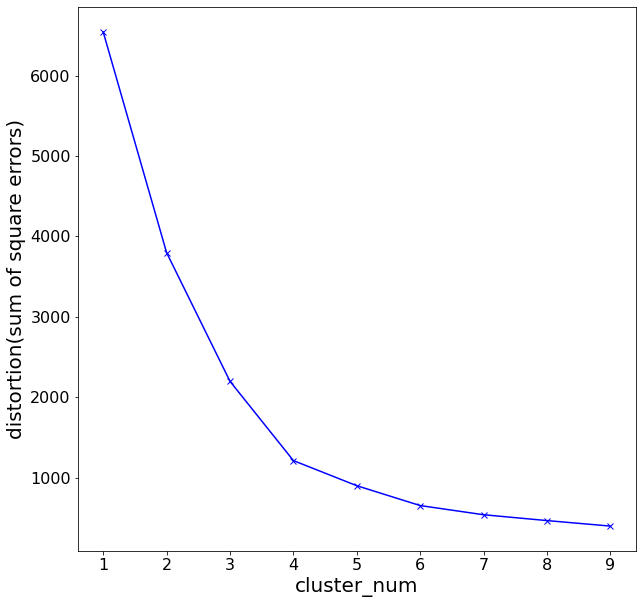

In [66]:
# 서울 데이터값
seoul_value = seoul_cluster_19[['ratio','PURCH_POWER']].values

#서울 K means
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000)
    kmeanModel.fit(seoul_value)
    distortions.append(kmeanModel.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)

plt.plot(K, distortions, 'bx-')
plt.xlabel('cluster_num', size=20)
plt.ylabel('distortion(sum of square errors)', size=20)
#plt.title('서울 군집 Elbow Methods')
plt.show()

## 적정 군집 4

In [67]:
# 적정 군집 - random_state = 38 로 해야 같은 군집이 나옴.
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init='k-means++',max_iter=10000, n_init=1000, verbose=2, random_state=38)
km.fit(seoul_value)
resultLable = km.labels_

seoul_data = seoul_cluster_19.copy()
seoul_data['label'] = resultLable
seoul_data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
start iteration
done sorting
end inner loop
Iteration 3, inertia 1212.0181818181818
start iteration
done sorting
end inner loop
Iteration 4, inertia 1212.0181818181818
center shift 0.000000e+00 within tolerance 9.625000e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1257.2272727272727
start iteration
done sorting
end inner loop
Iteration 1, inertia 1257.2272727272727
center shift 0.000000e+00 within tolerance 9.625000e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2051.5089285714284
start iteration
done sorting
end inner loop
Iteration 1, inertia 1744.8464285714288
start iteration
done sorting
end inner loop
Iteration 2, inertia 1414.017676767677
start iteration
done sorting
end inner loop
Iteration 3, inertia 1345.6444444444444
start iteration
done sorting
end inner loop
Iteration 4, inertia 1345.6444444444444
center shift 0.000000e+00 within tolerance 9.6250

,HDONG_NM,ratio,PURCH_POWER,label
0,공릉1동,22.0,12.0,0
1,공릉2동,25.0,11.0,0
2,광희동,30.0,21.0,0
3,다산동,24.0,9.0,0
4,동화동,9.0,27.0,3
5,명동,34.0,32.0,1
6,상계10동,12.0,2.0,2
7,상계1동,14.0,25.0,3
8,상계2동,19.0,33.0,1
9,상계3.4동,8.0,3.0,2


### 대구 군집

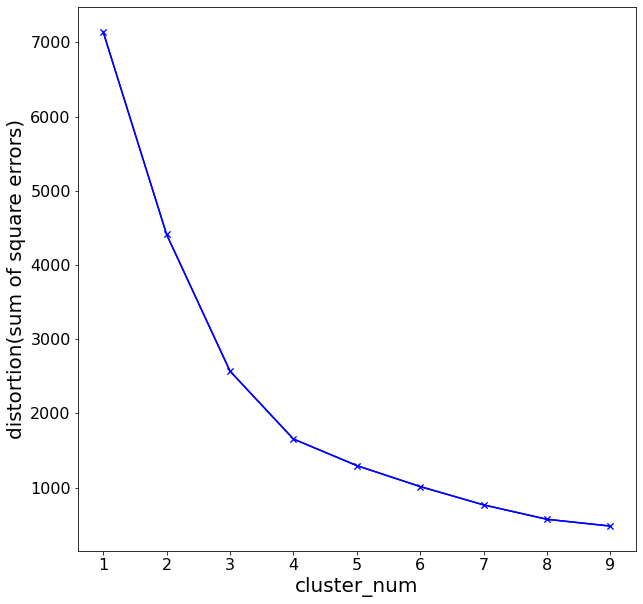

In [68]:
# 대구 데이터값
daegu_value = daegu_cluster_19[['ratio','PURCH_POWER']].values

#대구 K means
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000)
    kmeanModel.fit(daegu_value)
    distortions.append(kmeanModel.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'bx-')
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)

plt.plot(K, distortions, 'bx-')
plt.xlabel('cluster_num',size=20)
plt.ylabel('distortion(sum of square errors)',size=20)
#plt.title('대구 군집 Elbow Methods')
plt.show()

## 적정 군집 4

In [69]:
# 적정 군집 4
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init='k-means++',max_iter=10000, n_init=1000, verbose=2, random_state=37)
km.fit(daegu_value)
  
resultLable = km.labels_

daegu_data = daegu_cluster_19.copy()
daegu_data['label'] = resultLable
daegu_data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
end inner loop
Iteration 3, inertia 1680.4700577200579
center shift 0.000000e+00 within tolerance 1.020000e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2016.6958874458874
start iteration
done sorting
end inner loop
Iteration 1, inertia 1821.788888888889
start iteration
done sorting
end inner loop
Iteration 2, inertia 1671.0158730158726
start iteration
done sorting
end inner loop
Iteration 3, inertia 1671.0158730158726
center shift 0.000000e+00 within tolerance 1.020000e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2182.833333333333
start iteration
done sorting
end inner loop
Iteration 1, inertia 1743.9978632478635
start iteration
done sorting
end inner loop
Iteration 2, inertia 1675.8383838383836
start iteration
done sorting
end inner loop
Iteration 3, inertia 1675.8383838383836
center shift 0.000000e+00 within tolerance 1.020000e-02
Initialization complete

,HDONG_NM,ratio,PURCH_POWER,label
0,고산1동,15.0,21.0,0
1,고산2동,30.0,6.0,1
2,고산3동,1.0,28.0,0
3,남산1동,32.0,9.0,1
4,남산2동,33.0,5.0,1
5,남산3동,3.0,14.0,3
6,남산4동,7.0,19.0,0
7,대봉1동,31.0,20.0,2
8,대봉2동,9.0,7.0,3
9,대신동,26.0,23.0,2


## (5) 군집별 시각화
- 서울 대구 각각 4개의 군집이 있음

## 군집별 특징 
- 오른쪽상단 : 상권중심지역
- 왼쪽상단 : 주거상권지역
- 왼쪽하단 : 주거지역
- 오른쪽하단 : 교통중심지역

### 서울 군집 시각화

In [90]:
import plotly.graph_objs as go
import plotly.offline as pyo

# creating trace1
trace1 =go.Scatter(
                    x = seoul_data[seoul_data.label==1]['ratio'],
                    y = seoul_data[seoul_data.label==1]['PURCH_POWER'],
                    mode = "markers",
                    name = "상권지역",
                    marker = dict(color = 'red', size=10),
                    text= seoul_data.HDONG_NM)

# creating trace1
trace2 =go.Scatter(
                    x = seoul_data[seoul_data.label==3]['ratio'],
                    y = seoul_data[seoul_data.label==3]['PURCH_POWER'],
                    mode = "markers",
                    name = "주거상권지역",
                    marker = dict(color = 'blue', size=10),
                    text= seoul_data.HDONG_NM)
# creating trace1
trace3 =go.Scatter(
                    x = seoul_data[seoul_data.label==2]['ratio'],
                    y = seoul_data[seoul_data.label==2]['PURCH_POWER'],
                    mode = "markers",
                    name = "주거지역",
                    marker = dict(color = 'green', size=10),
                    text= seoul_data.HDONG_NM)

# creating trace1
trace4 =go.Scatter(
                    x = seoul_data[seoul_data.label==0]['ratio'],
                    y = seoul_data[seoul_data.label==0]['PURCH_POWER'],
                    mode = "markers",
                    name ='교통중심지역',
                    marker = dict(color = 'orange', size=10),
                    text= seoul_data.HDONG_NM)

data = [trace1, trace4, trace2, trace3 ]

layout = dict(#title = '서울',
              #title_x=0.5, # 제목 가운데
              #title_font_size=30,
              width=700,
              height=700,
              xaxis= dict(title= '인구유입률(Rank)',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력(Rank)',ticklen= 5,zeroline= False),
              font=dict(size=14),
#              legend=dict(x=0.9, y=0.9, traceorder='normal', font=dict(size=12,))
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )

fig = dict(data = data, layout = layout)
pyo.iplot(fig)

### 대구 군집 시각화

In [91]:
import plotly.graph_objs as go


# creating trace1
trace1 =go.Scatter(
                    x = daegu_data[daegu_data.label==2]['ratio'],
                    y = daegu_data[daegu_data.label==2]['PURCH_POWER'],
                    mode = "markers",
                    name = "상권지역",
                    marker = dict(color = 'red', size=10),
                    text= daegu_data.HDONG_NM)

# creating trace1
trace2 =go.Scatter(
                    x = daegu_data[daegu_data.label==0]['ratio'],
                    y = daegu_data[daegu_data.label==0]['PURCH_POWER'],
                    mode = "markers",
                    name = "주거상권지역",
                    marker = dict(color = 'blue', size=10),
                    text= daegu_data.HDONG_NM)
# creating trace1
trace3 =go.Scatter(
                    x = daegu_data[daegu_data.label==3]['ratio'],
                    y = daegu_data[daegu_data.label==3]['PURCH_POWER'],
                    mode = "markers",
                    name = "주거지역",
                    marker = dict(color = 'green', size=10),
                    text= daegu_data.HDONG_NM)

# creating trace1
trace4 =go.Scatter(
                    x = daegu_data[daegu_data.label==1]['ratio'],
                    y = daegu_data[daegu_data.label==1]['PURCH_POWER'],
                    mode = "markers",
                    name ='교통중심지역',
                    marker = dict(color = 'orange', size=10),
                    text= daegu_data.HDONG_NM)

data = [trace1, trace4, trace2, trace3 ] #, trace3, trace4, trace5]

layout = dict(#title = '대구',
              #title_x=0.5, # 제목 가운데
              #title_font_size=30,
              width=700,
              height=700,
              xaxis= dict(title= '인구유입률(Rank)',ticklen= 5,zeroline= False),
              yaxis= dict(title= '1인구매력(Rank)',ticklen= 5,zeroline= False),
              font=dict(size=14),
#              legend=dict(x=0.9, y=0.9, traceorder='normal', font=dict(size=12,))
              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
             )

fig = dict(data = data, layout = layout)
pyo.iplot(fig)

## (6) 최종 군집 결과

In [72]:
# 서울 - 순서대로 상권중심, 주거상권, 주거, 교통중심지역
print(seoul_data[seoul_data['label']==1]['HDONG_NM'].values) # 상권중심
print(seoul_data[seoul_data['label']==3]['HDONG_NM'].values) # 주거상권
print(seoul_data[seoul_data['label']==2]['HDONG_NM'].values) # 주거
print(seoul_data[seoul_data['label']==0]['HDONG_NM'].values) # 교통중심지역

['명동' '상계2동' '소공동' '필동' '회현동']
['동화동' '상계1동' '상계9동' '월계1동' '중계1동' '중계2.3동' '중계4동' '중계본동' '중림동' '하계1동']
['상계10동' '상계3.4동' '상계5동' '상계8동' '월계2동' '월계3동' '청구동' '하계2동']
['공릉1동' '공릉2동' '광희동' '다산동' '상계6.7동' '신당5동' '신당동' '약수동' '을지로동' '장충동' '황학동']


In [73]:
# 대구 - 순서대로 상권중심, 주거상권, 주거, 교통중심지역
print(daegu_data[daegu_data['label']==2]['HDONG_NM'].values)
print(daegu_data[daegu_data['label']==0]['HDONG_NM'].values)
print(daegu_data[daegu_data['label']==3]['HDONG_NM'].values)
print(daegu_data[daegu_data['label']==1]['HDONG_NM'].values)


['대봉1동' '대신동' '두산동' '범어1동' '범어2동' '삼덕동' '성내1동' '성내2동' '중동']
['고산1동' '고산3동' '남산4동' '만촌3동' '범물1동' '범어3동' '범어4동' '지산1동' '지산2동']
['남산3동' '대봉2동' '범물2동' '상동' '수성1가동' '수성4가동' '파동' '황금1동']
['고산2동' '남산1동' '남산2동' '동인동' '만촌1동' '만촌2동' '성내3동' '수성2.3가동' '황금2동']
